In [2]:
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
import random 
import math

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr 

import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import display_html

In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

### Loading DataFrame

In [4]:
train_df = pd.read_csv('../data/raw_data.csv')

In [5]:
train_df.shape

(100000, 55)

In [6]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [7]:
train_df.select_dtypes(include=['object']).shape

(100000, 10)

In [8]:
train_df.select_dtypes(exclude=['object']).shape

(100000, 45)

In [9]:
train_df.describe()

,State_of_Charge,State_of_Health,Voltage,Current,Temperature,Cycling_Count,Internal_Resistance,Rate_of_Charge,Charge_Discharge_Efficiency,Depth_of_Discharge,...,Payload_Distribution,Payload_Changes,Trailer_Attachment,Start_Stop_Frequency,Auxiliary_Power_Usage,Truck_Speed,Acceleration,Climate_Control_Usage,Battery_Health,Battery_Class
count,100000.000000,65100.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,71440.000000,87400.000000,100000.000000,...,100000.000000,88541.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,82984.000000,100000.000000
mean,0.648403,0.899971,400.005792,44.989627,88.976047,799.852851,2.500490,0.499905,0.850263,0.323226,...,0.480734,0.500250,0.507135,2.982533,0.433625,59.928534,1.501261,0.500199,80.015873,0.448650
std,8.741073,0.049875,9.994768,9.990574,31.854488,200.265975,0.500348,0.100053,0.049753,16.152379,...,11.717059,0.049916,6.730006,2.087793,14.912974,10.007798,0.502124,0.100297,10.023141,0.497359
min,-99.937496,0.680032,354.251645,-3.361157,-99.921739,-36.458804,0.399370,0.112255,0.621505,-99.982810,...,-99.917392,0.295707,-99.952554,-97.501690,-99.977982,16.030979,-0.722982,0.060835,37.953676,0.000000
25%,0.630178,0.866213,393.239736,38.314488,68.971244,665.081795,2.162532,0.432527,0.816647,0.225544,...,0.464403,0.466522,0.431252,2.314036,0.427434,53.212988,1.162645,0.432681,73.263253,0.000000
50%,0.700184,0.899788,400.017302,45.011025,89.432061,800.450214,2.500286,0.499541,0.850375,0.299267,...,0.499624,0.500401,0.500211,2.999861,0.500265,59.929428,1.501744,0.500207,79.998127,0.000000
75%,0.769524,0.933509,406.751171,51.696054,109.890685,934.902856,2.839157,0.567405,0.884033,0.374743,...,0.534913,0.533741,0.568165,3.673386,0.573570,66.672251,1.839948,0.567581,86.805174,1.000000
max,99.901312,1.105537,442.652261,91.880948,232.484264,1599.023852,4.696509,0.887519,1.079664,99.955931,...,99.894510,0.708543,99.837339,97.925745,99.980072,102.154006,3.576563,0.924188,124.208917,1.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Timestamp                    67446 non-null   object 
 1   State_of_Charge              100000 non-null  float64
 2   State_of_Health              65100 non-null   float64
 3   Voltage                      100000 non-null  float64
 4   Current                      100000 non-null  float64
 5   Temperature                  100000 non-null  float64
 6   Cycling_Count                100000 non-null  float64
 7   Internal_Resistance          100000 non-null  float64
 8   Rate_of_Charge               71440 non-null   float64
 9   Charge_Discharge_Efficiency  87400 non-null   float64
 10  Depth_of_Discharge           100000 non-null  float64
 11  Charge_Rate                  100000 non-null  float64
 12  Discharge_Rate               100000 non-null  float64
 13  

#### Checking Missing Values

In [11]:
train_df.isna().sum().head(20)

Timestamp                      32554
State_of_Charge                    0
State_of_Health                34900
Voltage                            0
Current                            0
Temperature                        0
Cycling_Count                      0
Internal_Resistance                0
Rate_of_Charge                 28560
Charge_Discharge_Efficiency    12600
Depth_of_Discharge                 0
Charge_Rate                        0
Discharge_Rate                     0
Voltage_Sag                    14535
Cell_Balancing_Status          24354
Self_Discharge_Rate                0
EIS_Data                           0
Cycle_Life                         0
Max_Charge_Power                9176
Max_Discharge_Power                0
dtype: int64

In [12]:
train_df.drop('Timestamp',axis=1,inplace=True)

In [13]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (total / len(train_df)) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage']).reset_index()

In [14]:
missing_df.drop('Total',axis=1,inplace=True)

In [15]:
# df2_styler = missing_df.tail(20).style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
df1_styler = missing_df.head(15).style.set_table_attributes("style='display:inline'")
df2_styler = missing_df.iloc[15:30,:].style.set_table_attributes("style='display:inline'")
df3_styler = missing_df.iloc[30:45,:].style.set_table_attributes("style='display:inline'")
df4_styler = missing_df.tail(10).style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,index,Percentage
0,State_of_Health,34.900000
1,Truck_Model,31.427000
2,Rate_of_Charge,28.560000
3,Tire_Pressure,28.396000
4,Load_Weight,27.624000
5,Driver_Experience,24.403000
6,Cell_Balancing_Status,24.354000
7,Electrolyte_Level,22.093000
8,Altitude_Change,20.696000
9,Regenerative_Braking,18.151000


In [16]:
cat_columns = train_df.select_dtypes(['object','category']).columns.to_list()
num_columns = train_df.select_dtypes(['int','float']).columns.to_list()

In [17]:
num_columns.remove('Battery_Health')
num_columns.remove('Battery_Class')

In [18]:
len(num_columns) + len(cat_columns) 

52

In [19]:
num_columns

['State_of_Charge',
 'State_of_Health',
 'Voltage',
 'Current',
 'Temperature',
 'Cycling_Count',
 'Internal_Resistance',
 'Rate_of_Charge',
 'Charge_Discharge_Efficiency',
 'Depth_of_Discharge',
 'Charge_Rate',
 'Discharge_Rate',
 'Voltage_Sag',
 'Cell_Balancing_Status',
 'Self_Discharge_Rate',
 'EIS_Data',
 'Cycle_Life',
 'Max_Charge_Power',
 'Max_Discharge_Power',
 'Anode_Degradation',
 'Cathode_Degradation',
 'Electrolyte_Level',
 'Chemical_Composition',
 'Rate_of_Charge_Peak',
 'Rate_of_Discharge_Peak',
 'Calendar_Aging',
 'Cell_Voltage_Balance',
 'Altitude_Change',
 'Tire_Pressure',
 'Regenerative_Braking',
 'Load_Weight',
 'Road_Inclination',
 'Idle_Time',
 'Charging_Time',
 'Charging_Frequency',
 'Payload_Distribution',
 'Payload_Changes',
 'Trailer_Attachment',
 'Start_Stop_Frequency',
 'Auxiliary_Power_Usage',
 'Truck_Speed',
 'Acceleration',
 'Climate_Control_Usage']

#### Applying KNN imputer for numerical variables

In [20]:
from sklearn.impute import KNNImputer
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(train_df[num_columns])
train_df[num_columns] = imputer.transform(train_df[num_columns])

In [22]:
for col in train_df[cat_columns].columns:
    missing_len = train_df[col].isna().sum()
    li = train_df[~(train_df[col].isna())][col].to_list()
    train_df.loc[train_df[col].isna(),col] = [random.choice(li) for x in range(0, missing_len)]

In [24]:
# df2_styler = missing_df.tail(20).style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (total / len(train_df)) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage']).reset_index()
missing_df.drop('Total',axis=1, inplace=True)

df1_styler = missing_df.head(15).style.set_table_attributes("style='display:inline'")
df2_styler = missing_df.iloc[15:30,:].style.set_table_attributes("style='display:inline'")
df3_styler = missing_df.iloc[30:44,:].style.set_table_attributes("style='display:inline'")
df4_styler = missing_df.tail(10).style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,index,Percentage
0,Battery_Health,17.016000
1,State_of_Charge,0.000000
2,Truck_Speed,0.000000
3,Regenerative_Braking,0.000000
4,Load_Weight,0.000000
5,Road_Inclination,0.000000
6,Idle_Time,0.000000
7,Charging_Time,0.000000
8,Charging_Frequency,0.000000
9,Payload_Distribution,0.000000


In [25]:
train_df['Battery_Class'].value_counts(normalize=True)

Battery_Class
0    0.55135
1    0.44865
Name: proportion, dtype: float64

In [27]:
train_df[['Driving_Pattern','Weather_Conditions']].head(10)

,Driving_Pattern,Weather_Conditions
0,Aggressive,Sunny
1,Moderate,Snowy
2,Aggressive,Sunny
3,Moderate,Sunny
4,Moderate,Snowy
5,Aggressive,Snowy
6,Moderate,-14.827896980305695
7,Moderate,8.883363640875942
8,Aggressive,Snowy
9,Aggressive,Rainy


#### Cleaning noise from categorical columns and imputing it with mode

In [28]:
# Loop through all columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = [str(x) for x in train_df[col]]
        # Check if each element in the column can be converted to a numeric value
        numeric_mask = pd.to_numeric(train_df[col], errors='coerce').notna()
        
        if numeric_mask.any():
            # Find the mode of the column excluding the numeric values
            mode_val = train_df.loc[~numeric_mask, col].mode()[0]
            
            # Replace numeric values with the mode
            train_df.loc[numeric_mask, col] = mode_val



In [29]:
train_df[['Driving_Pattern','Weather_Conditions']].head(10)

,Driving_Pattern,Weather_Conditions
0,Aggressive,Sunny
1,Moderate,Snowy
2,Aggressive,Sunny
3,Moderate,Sunny
4,Moderate,Snowy
5,Aggressive,Snowy
6,Moderate,Sunny
7,Moderate,Sunny
8,Aggressive,Snowy
9,Aggressive,Rainy


#### Dropping Duplicates

In [30]:
train_df = train_df.drop_duplicates(keep='last')

#### Check and Treat Outliers

In [31]:
# Define a function to detect and treat outliers in each column
def treat_outliers(df, method='z-score', threshold=2):
    treated_df = df.copy()  # Create a copy of the original DataFrame
    outliers_info = {}  # Dictionary to store column names and outlier percentages
    
    for col in treated_df.columns:
        column_data = treated_df[col]
        if method == 'z-score':
            z_scores = np.abs((column_data - column_data.mean()) / column_data.std())
            outliers = z_scores > threshold
        elif method == 'IQR':
            Q1 = column_data.quantile(0.25)
            Q3 = column_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = (column_data < lower_bound) | (column_data > upper_bound)
        
        # Calculate the percentage of outliers in the column
        percent_outliers = (outliers.sum() / len(column_data)) * 100
        if percent_outliers > 0:
            outliers_info[col] = percent_outliers  # Store column name and outlier percentage
        
        # Replace outliers with the median of the column
        treated_df.loc[outliers, col] = column_data.median()
    
    return treated_df, outliers_info

# Apply the treat_outliers function to the entire DataFrame using z-score method
train_df[num_columns], outliers_info = treat_outliers(train_df[num_columns], method='z-score', threshold=2)



In [32]:
outliers_info

{'State_of_Charge': 1.8960000000000001,
 'State_of_Health': 5.728,
 'Voltage': 4.53,
 'Current': 4.636,
 'Temperature': 4.029,
 'Cycling_Count': 4.502,
 'Internal_Resistance': 4.492999999999999,
 'Rate_of_Charge': 5.643,
 'Charge_Discharge_Efficiency': 4.984999999999999,
 'Depth_of_Discharge': 5.298,
 'Charge_Rate': 1.553,
 'Discharge_Rate': 4.607,
 'Voltage_Sag': 5.371,
 'Cell_Balancing_Status': 5.582,
 'Self_Discharge_Rate': 2.691,
 'EIS_Data': 2.174,
 'Cycle_Life': 4.5809999999999995,
 'Max_Charge_Power': 4.931,
 'Max_Discharge_Power': 4.492,
 'Anode_Degradation': 6.2700000000000005,
 'Cathode_Degradation': 4.553,
 'Electrolyte_Level': 5.425,
 'Chemical_Composition': 4.36,
 'Rate_of_Charge_Peak': 5.546,
 'Rate_of_Discharge_Peak': 4.398,
 'Calendar_Aging': 5.11,
 'Cell_Voltage_Balance': 4.548,
 'Altitude_Change': 3.821,
 'Tire_Pressure': 5.655,
 'Regenerative_Braking': 1.7659999999999998,
 'Load_Weight': 2.71,
 'Road_Inclination': 4.504,
 'Idle_Time': 4.523,
 'Charging_Time': 5.027,


In [33]:
train_df['Battery_Class'].value_counts(normalize=True)

Battery_Class
0    0.55135
1    0.44865
Name: proportion, dtype: float64

In [34]:
train_df.drop('Battery_Health',1,inplace=True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   State_of_Charge              100000 non-null  float64
 1   State_of_Health              100000 non-null  float64
 2   Voltage                      100000 non-null  float64
 3   Current                      100000 non-null  float64
 4   Temperature                  100000 non-null  float64
 5   Cycling_Count                100000 non-null  float64
 6   Internal_Resistance          100000 non-null  float64
 7   Rate_of_Charge               100000 non-null  float64
 8   Charge_Discharge_Efficiency  100000 non-null  float64
 9   Depth_of_Discharge           100000 non-null  float64
 10  Charge_Rate                  100000 non-null  float64
 11  Discharge_Rate               100000 non-null  float64
 12  Voltage_Sag                  100000 non-null  float64
 13  

#### EDA

### Univariate Analysis

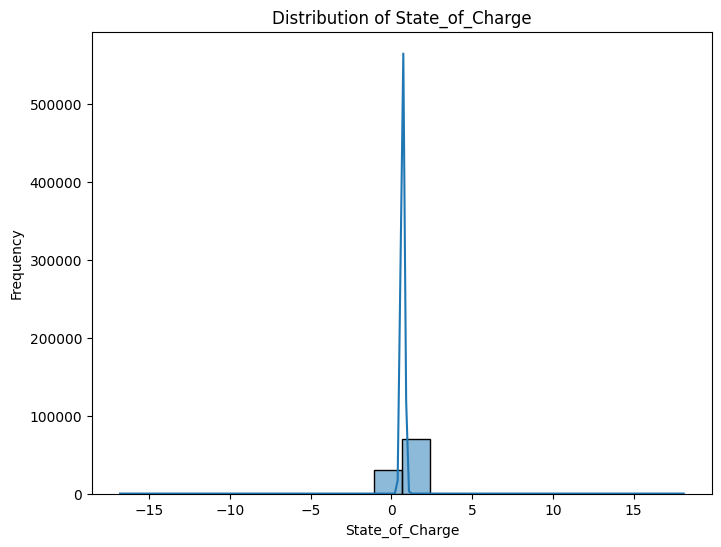

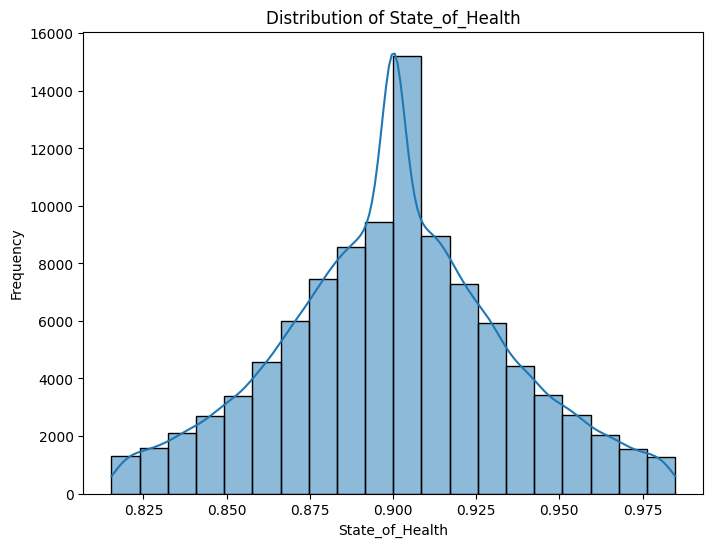

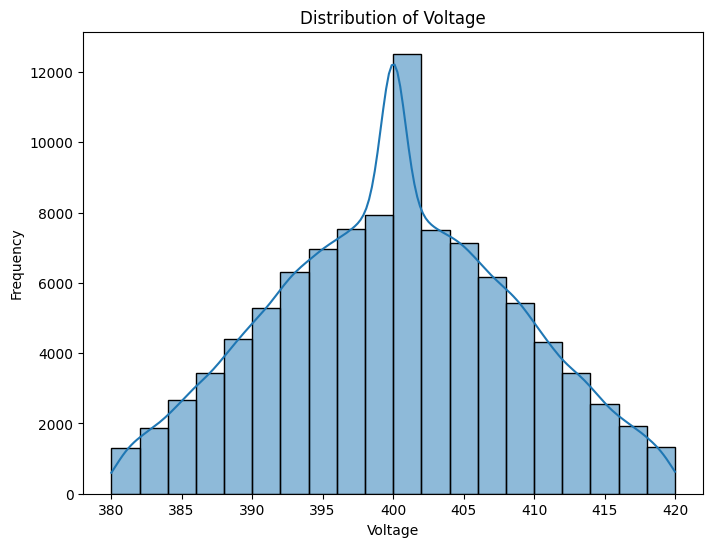

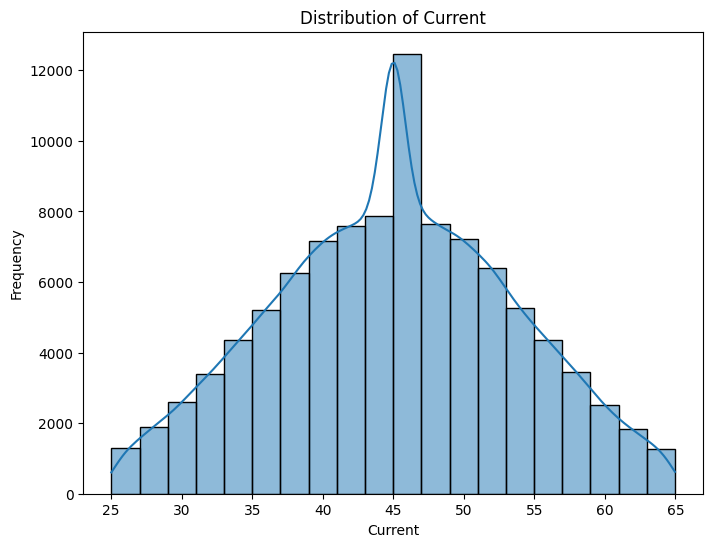

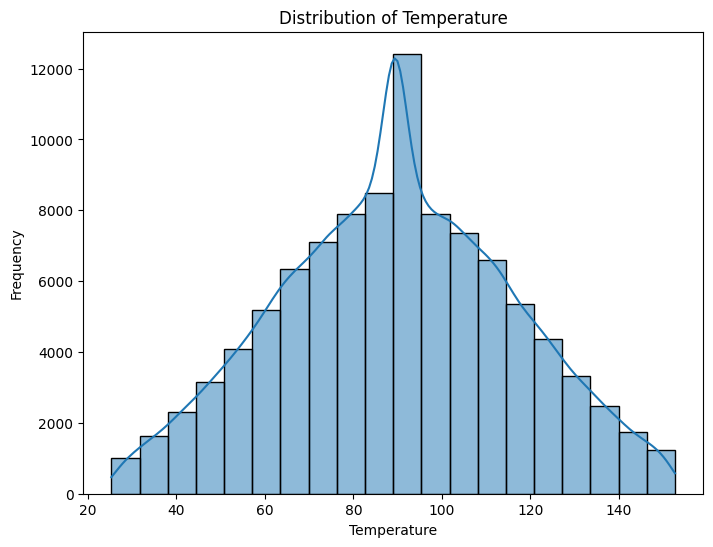

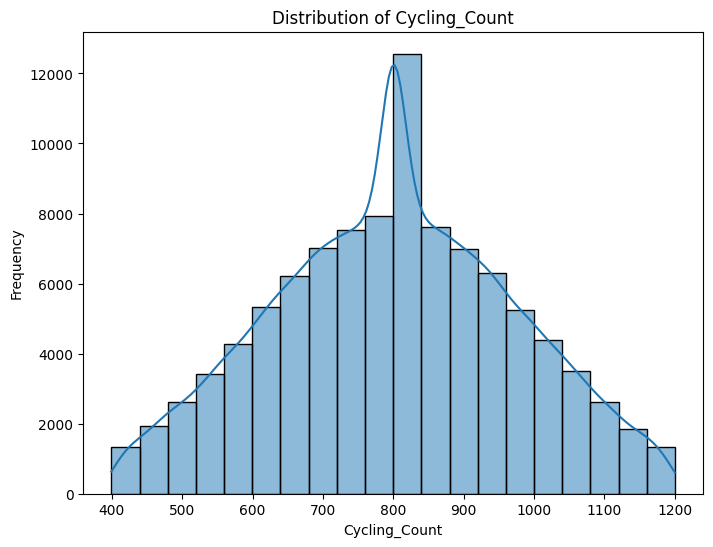

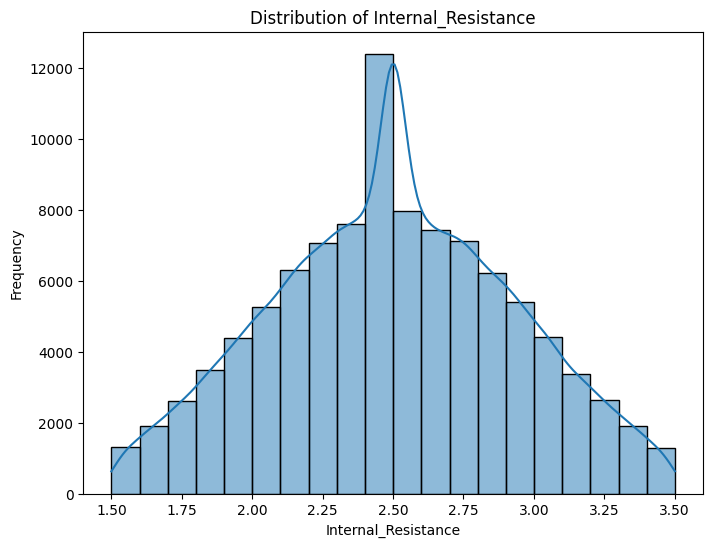

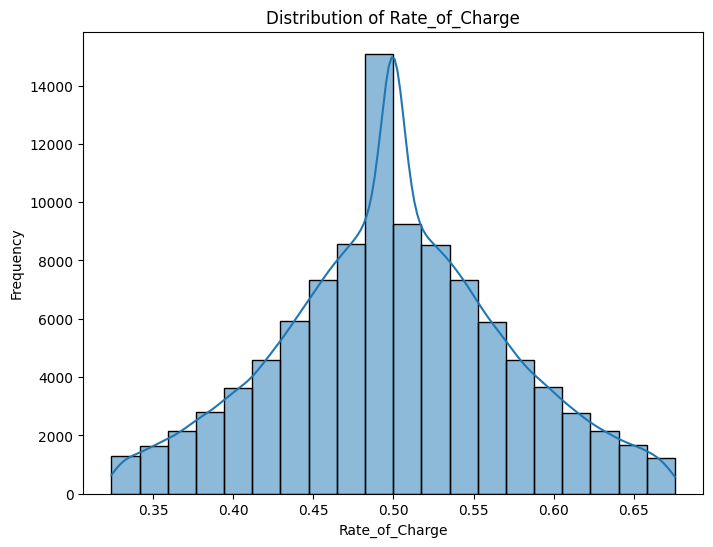

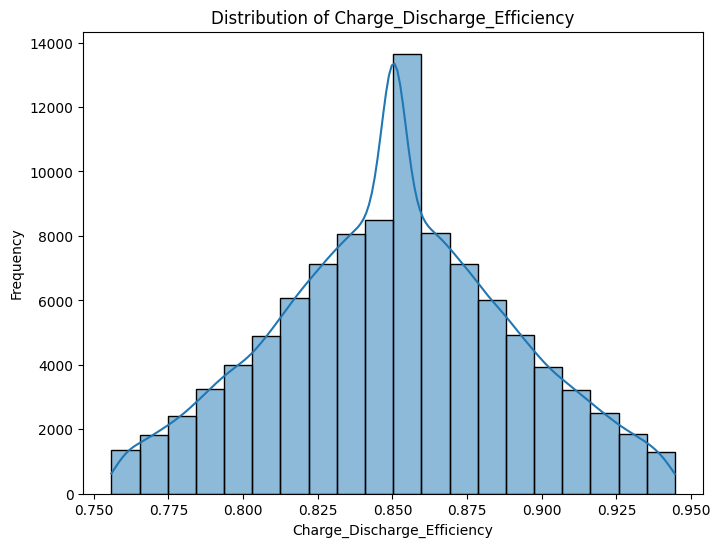

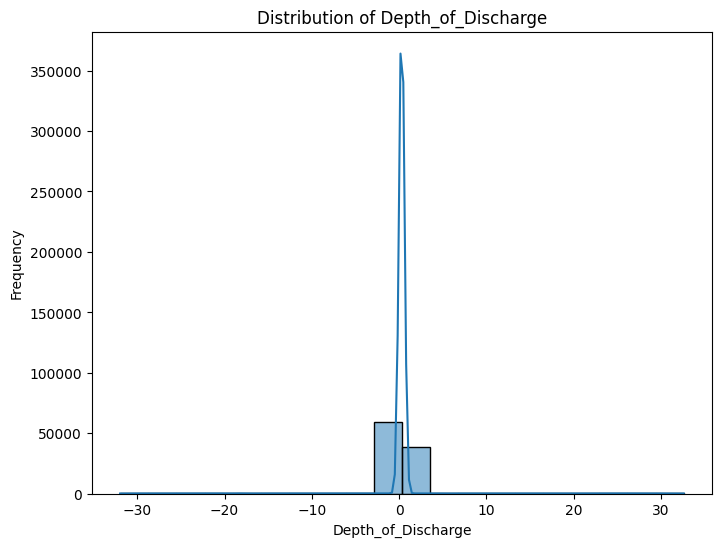

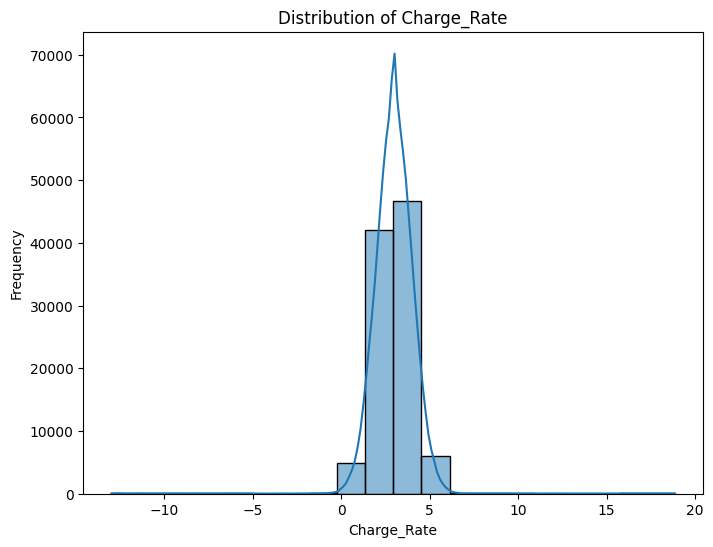

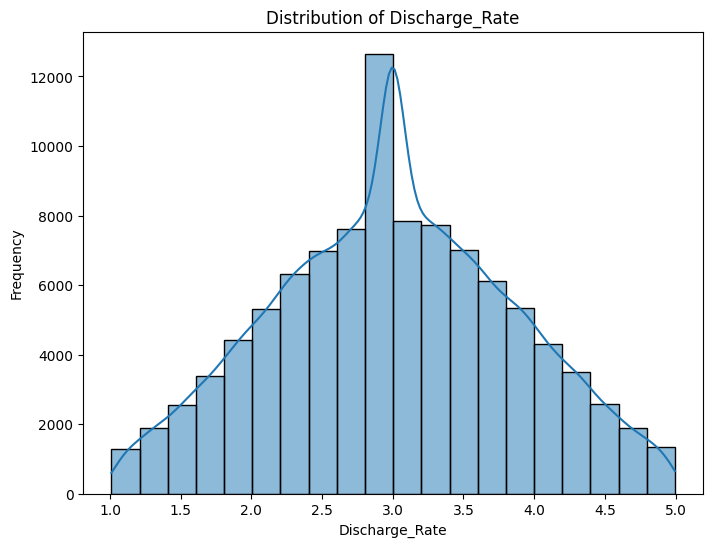

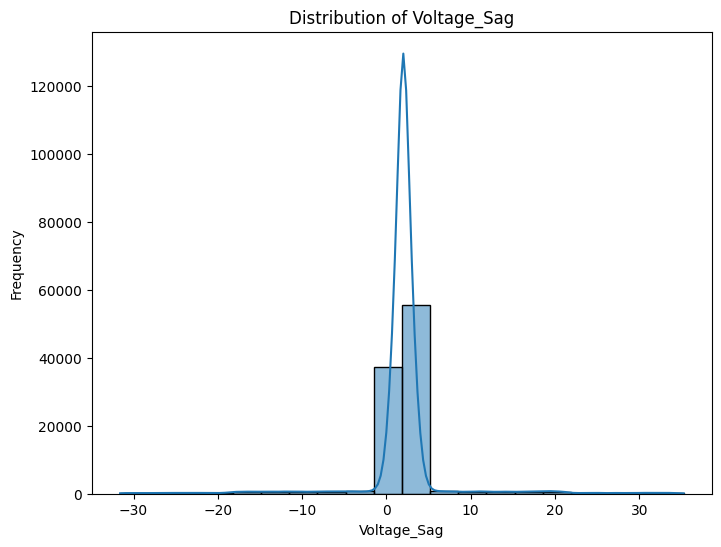

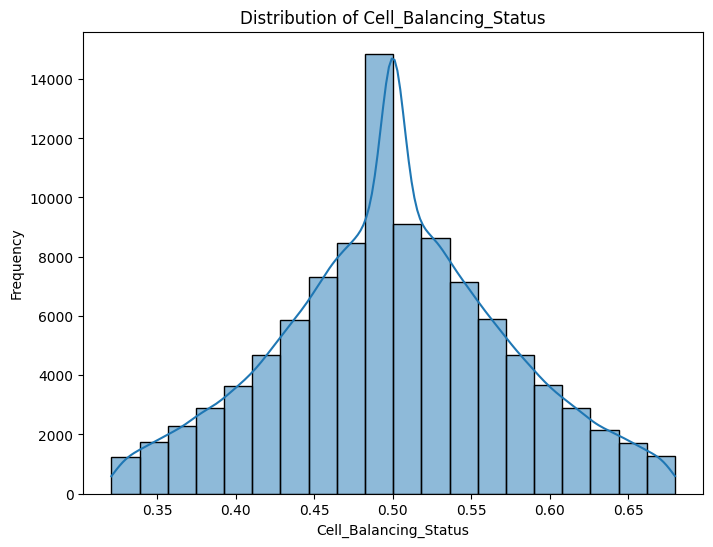

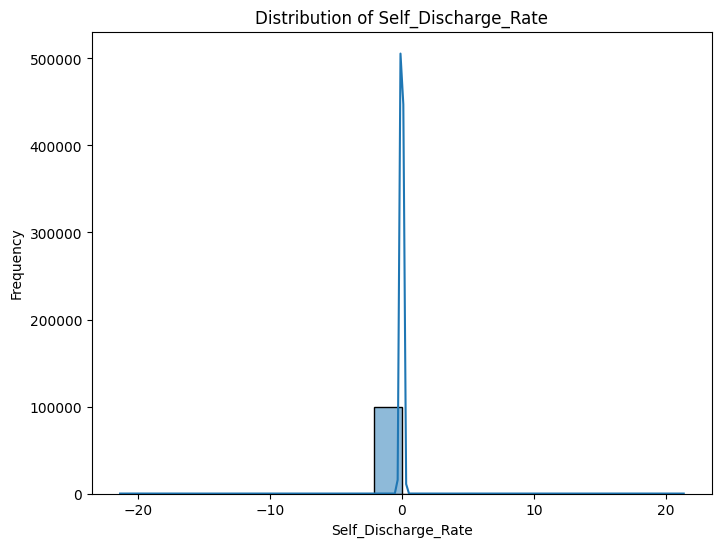

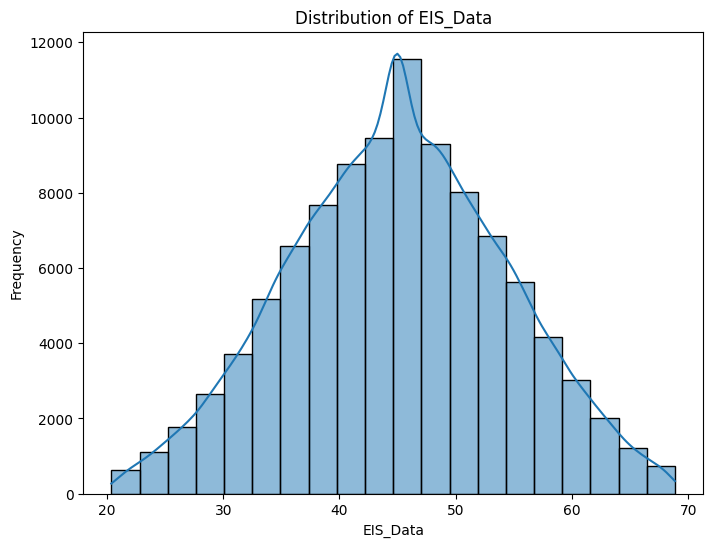

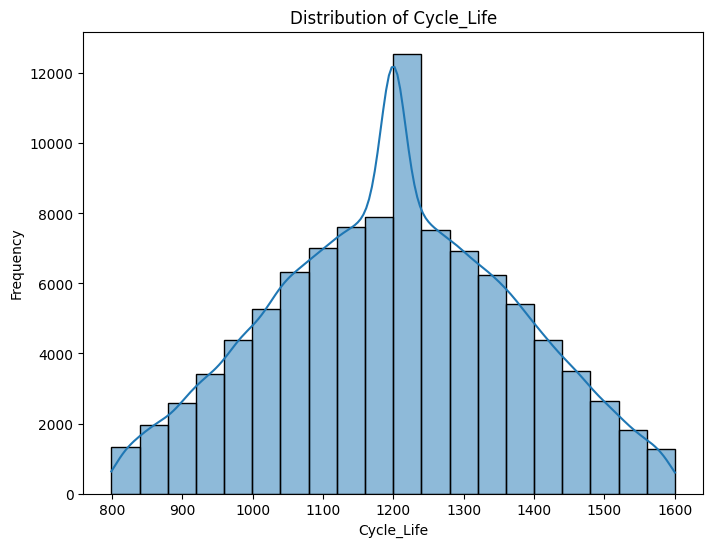

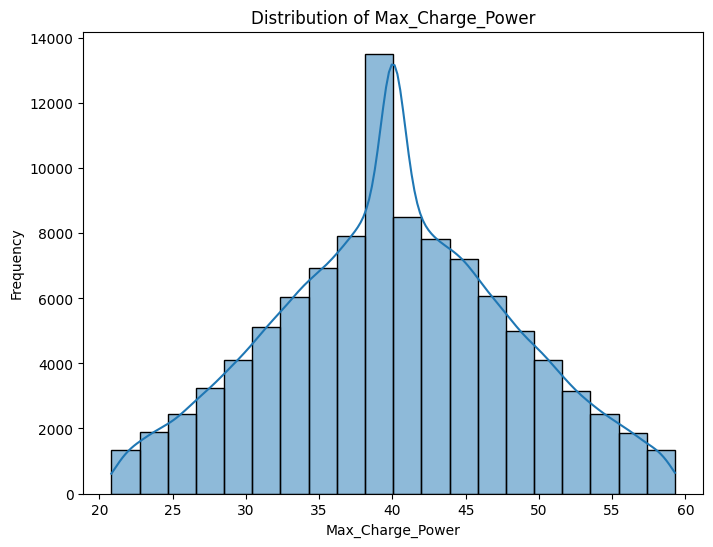

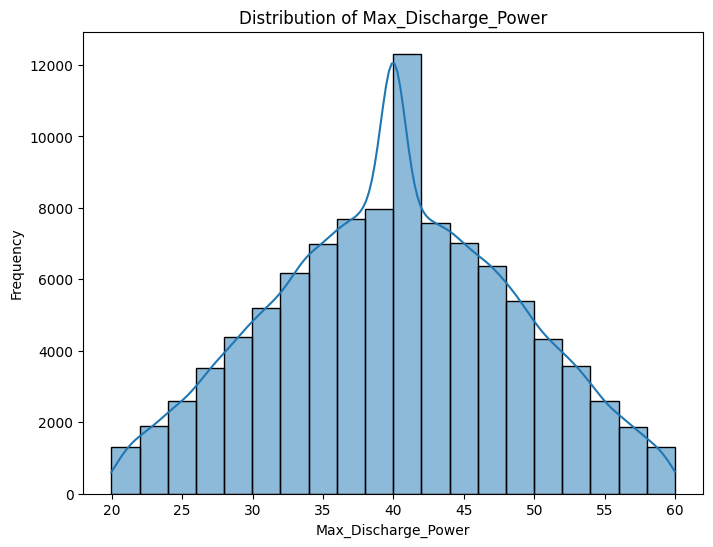

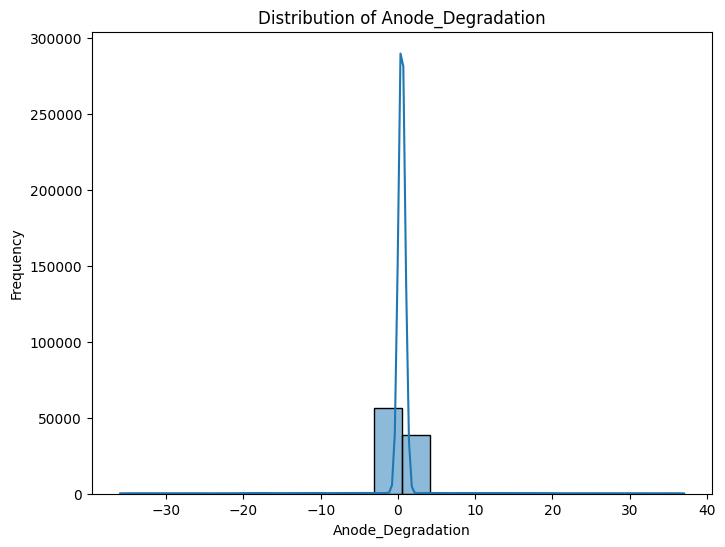

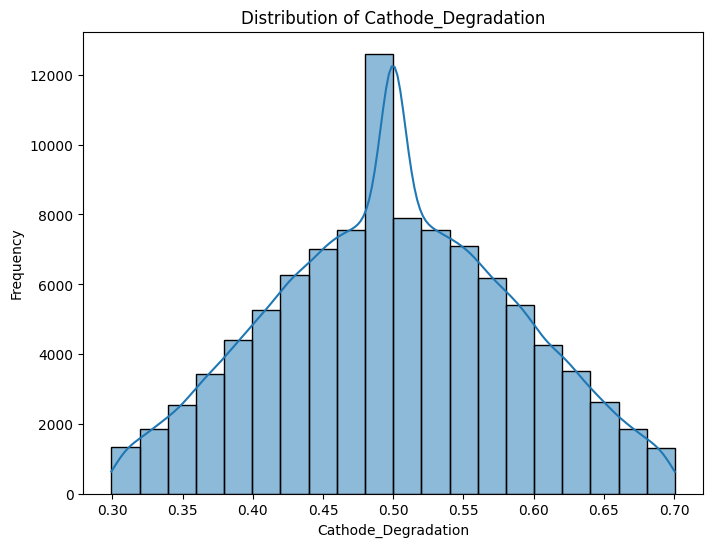

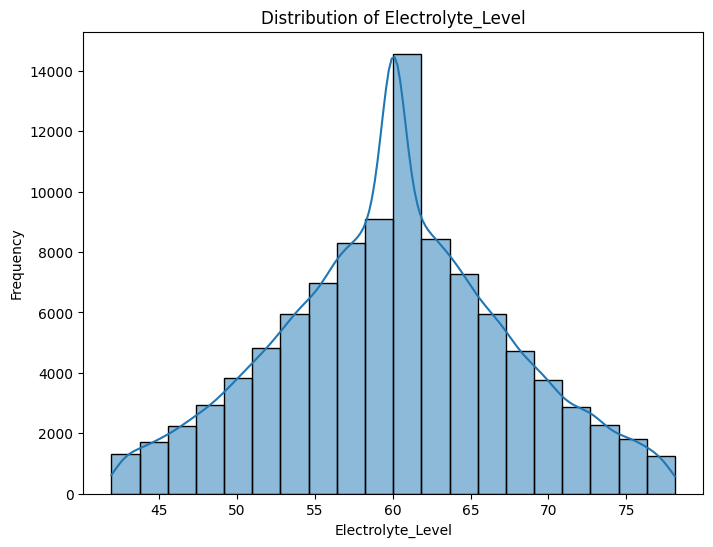

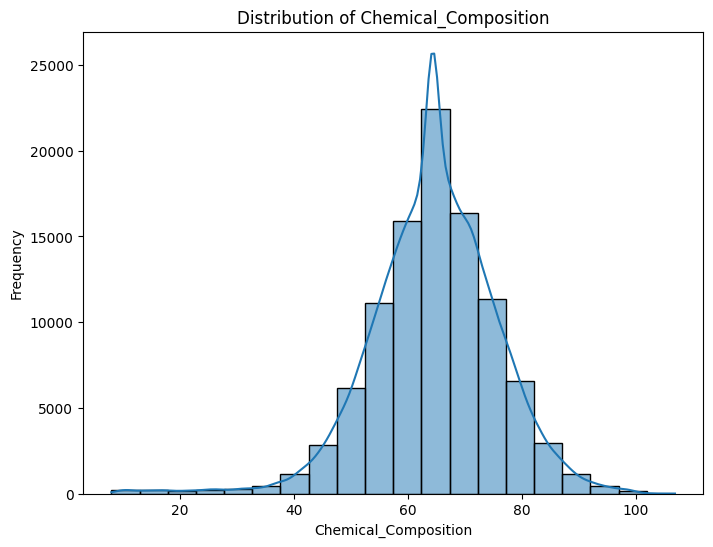

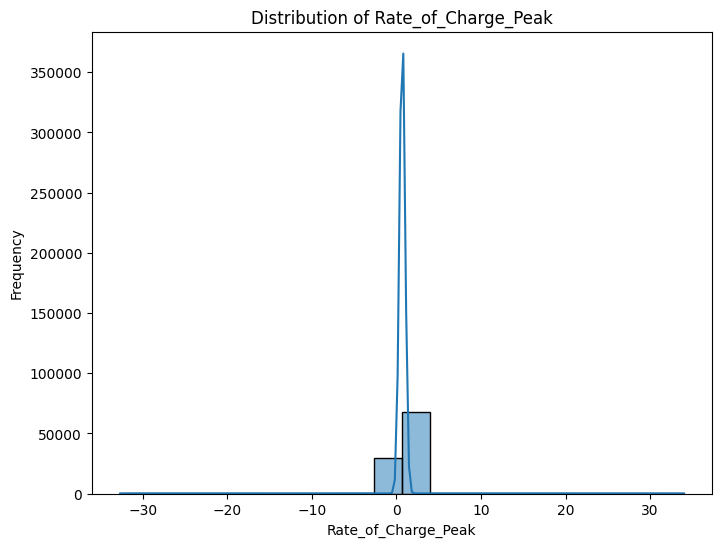

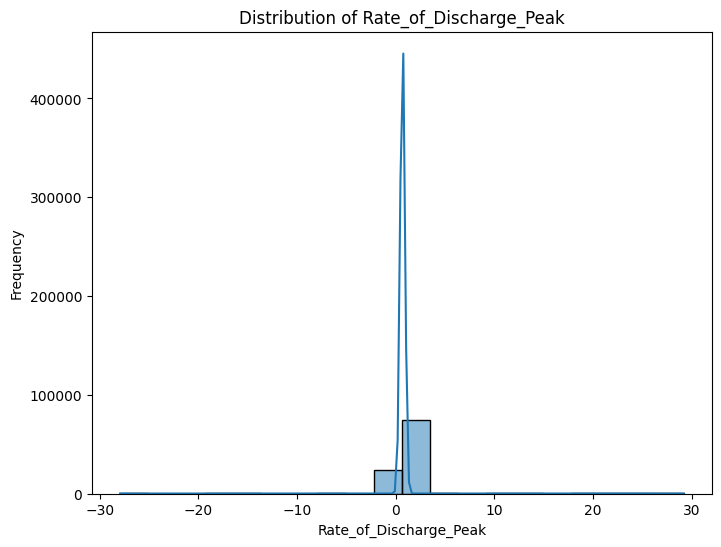

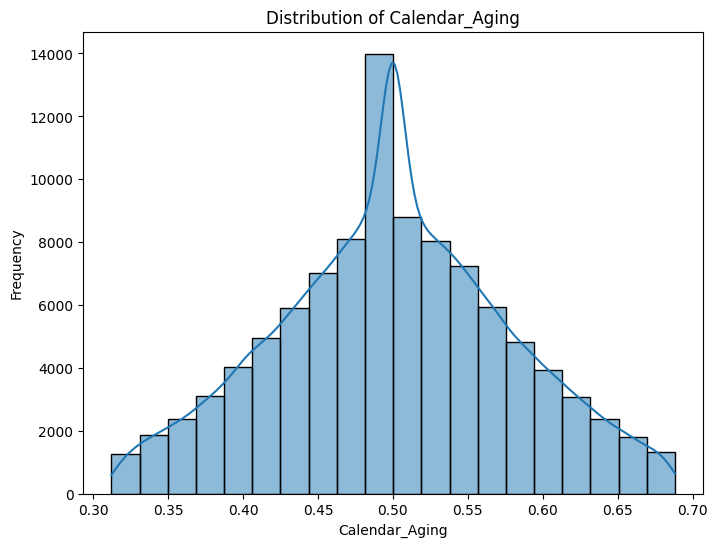

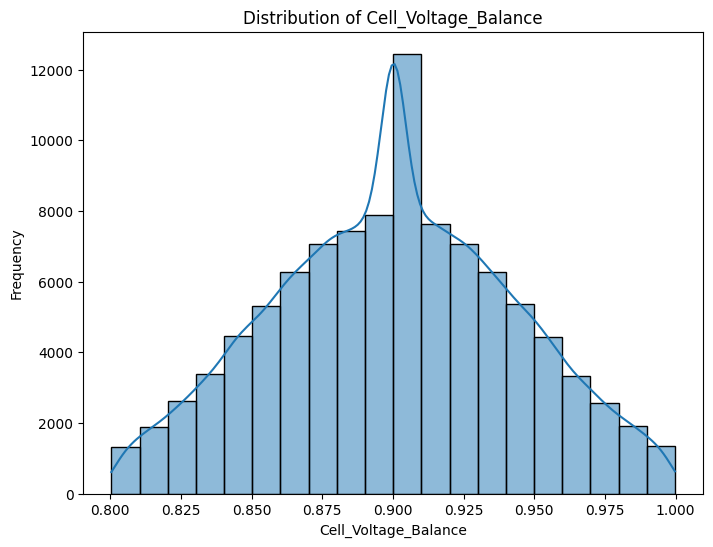

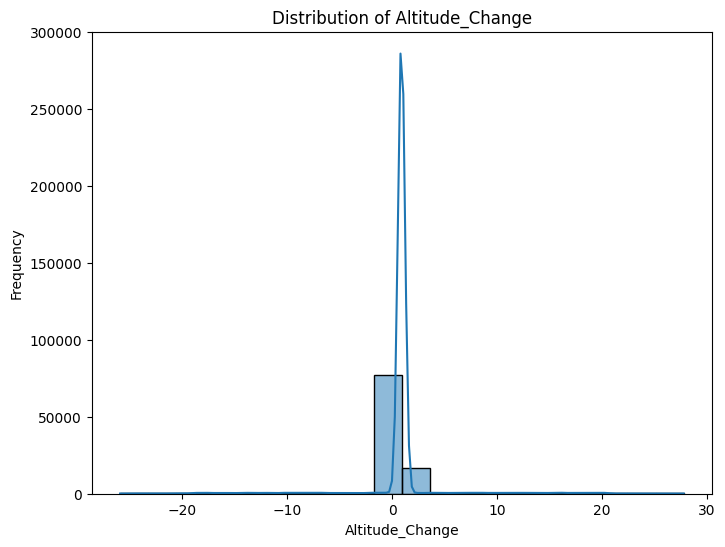

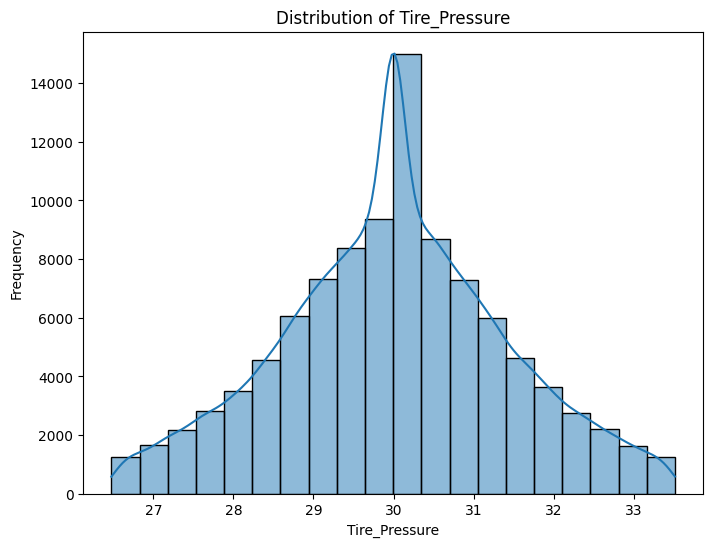

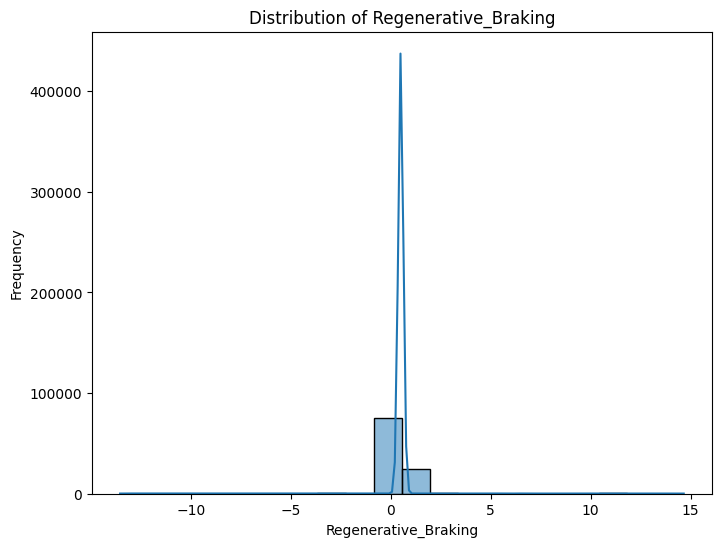

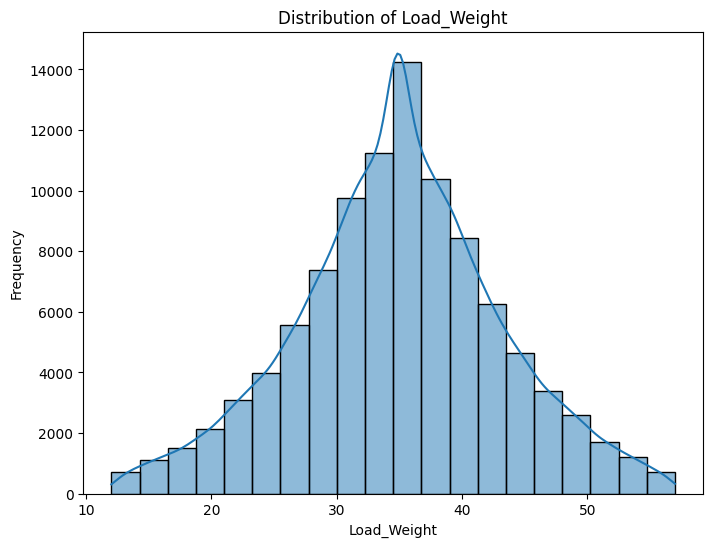

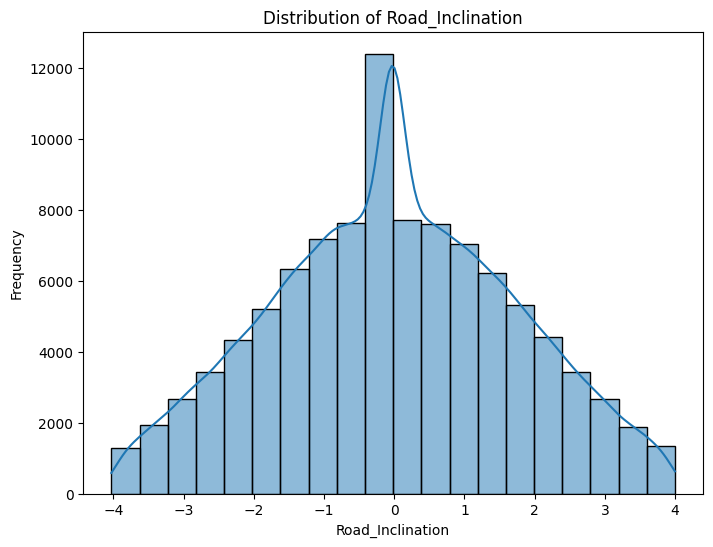

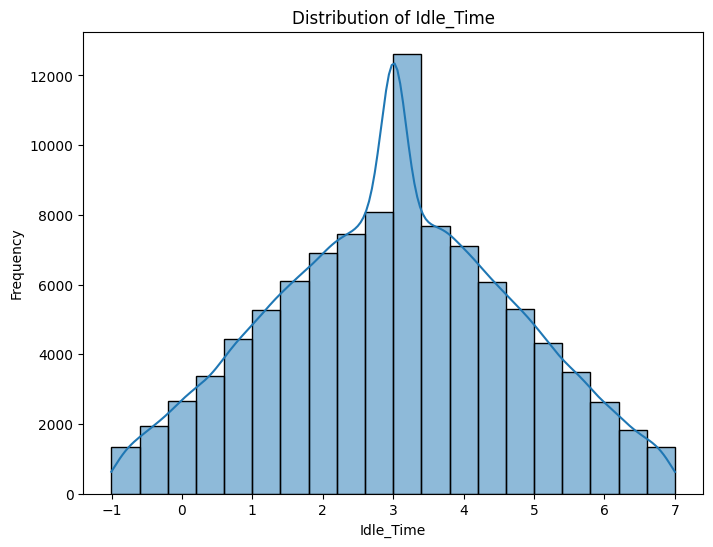

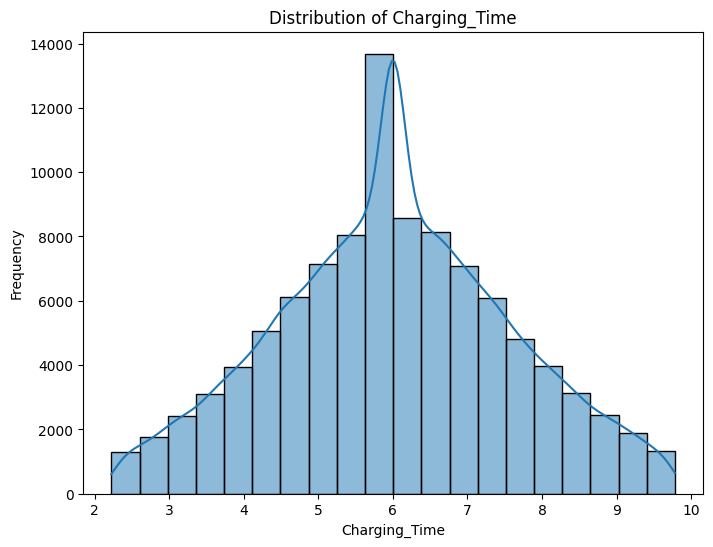

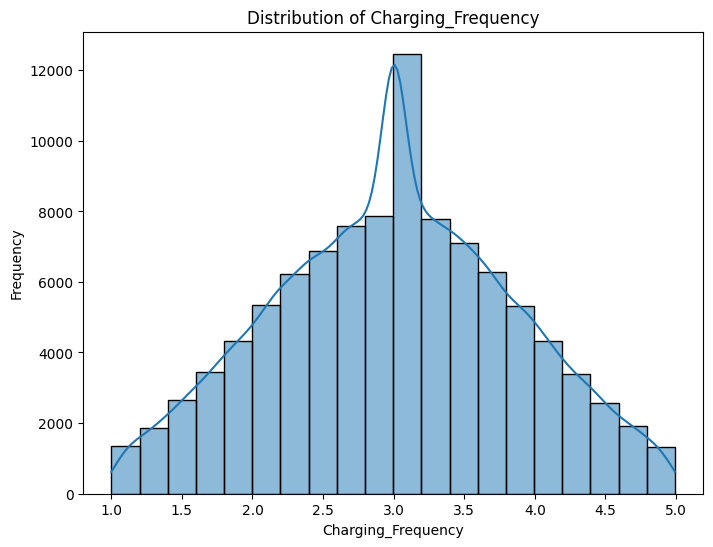

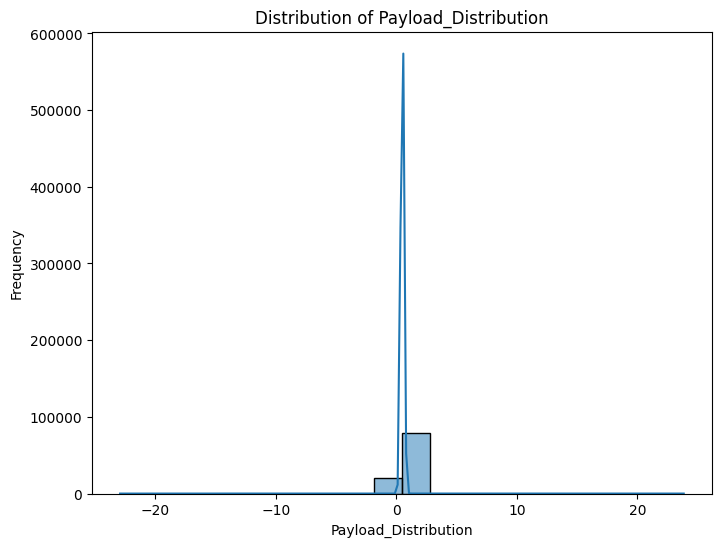

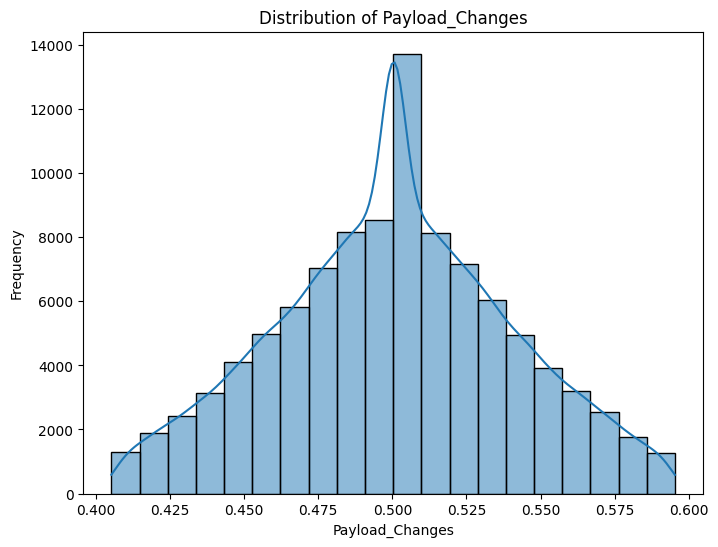

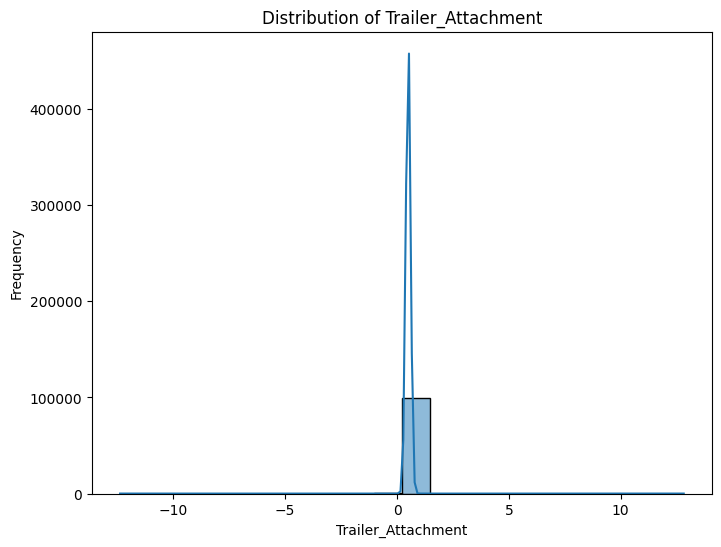

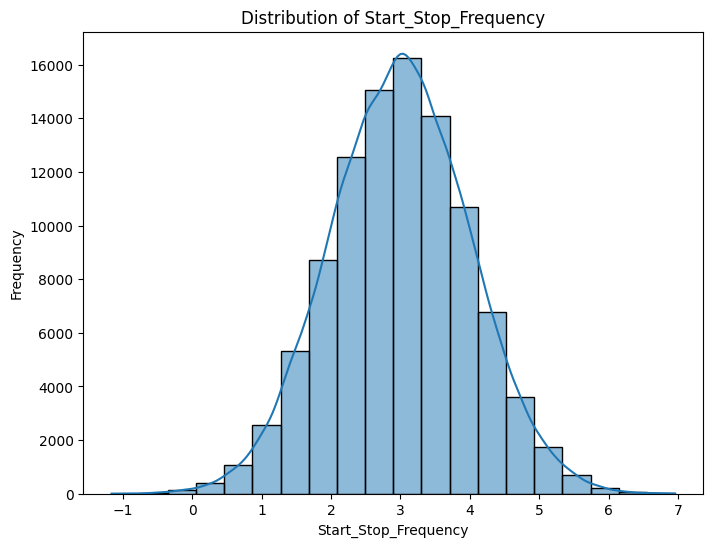

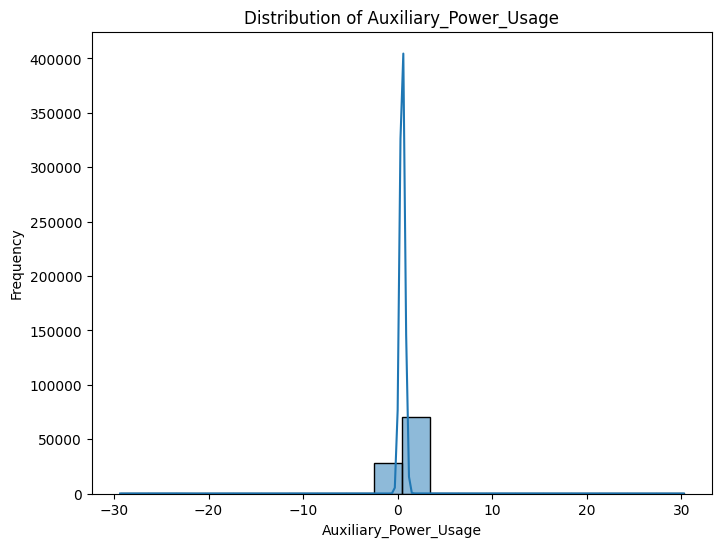

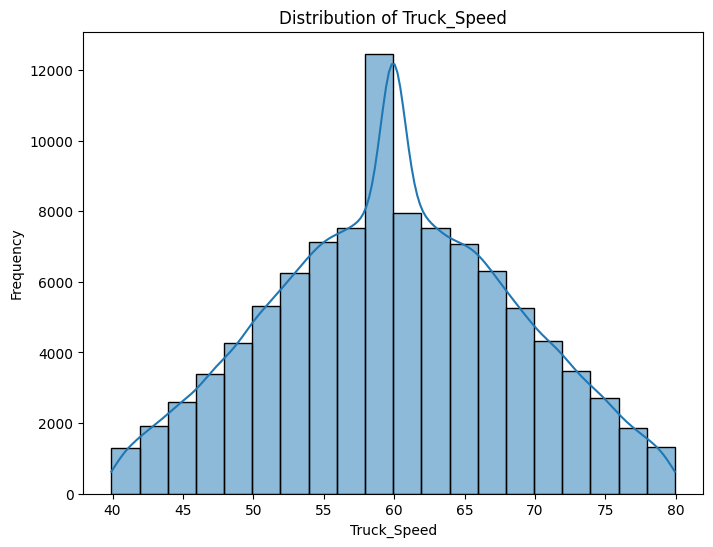

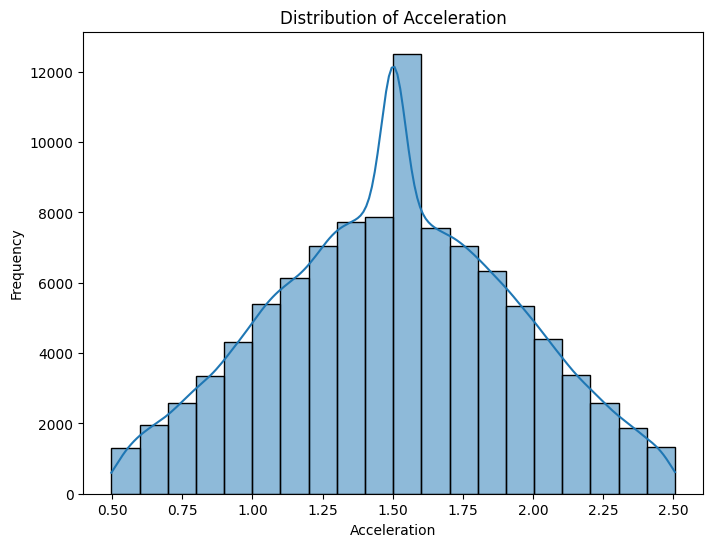

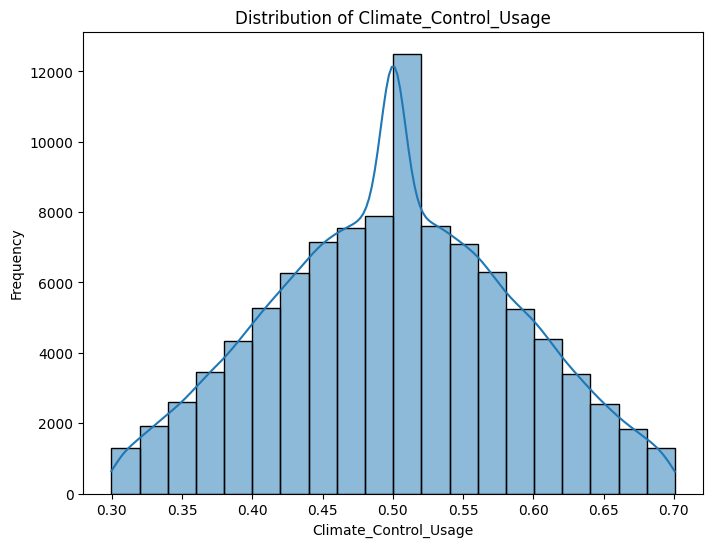

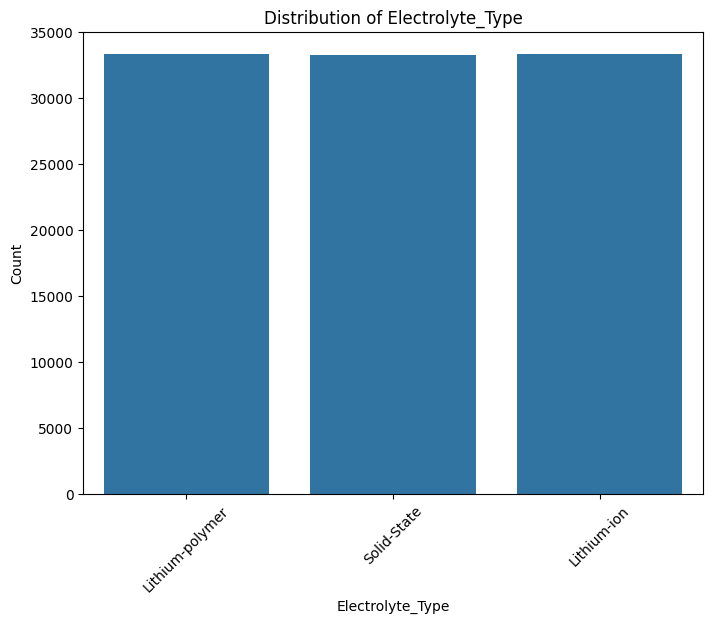

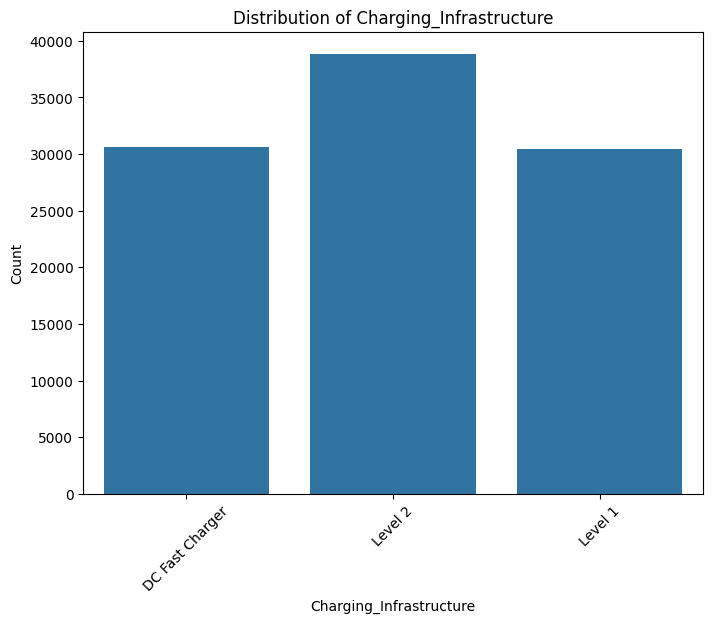

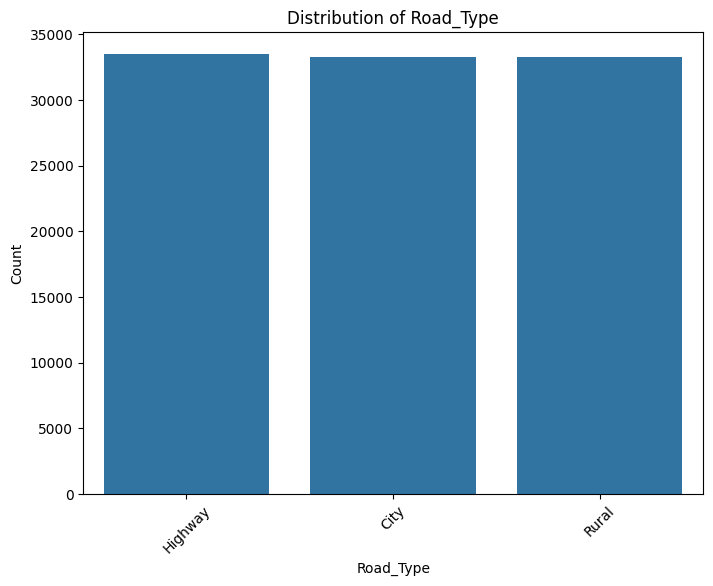

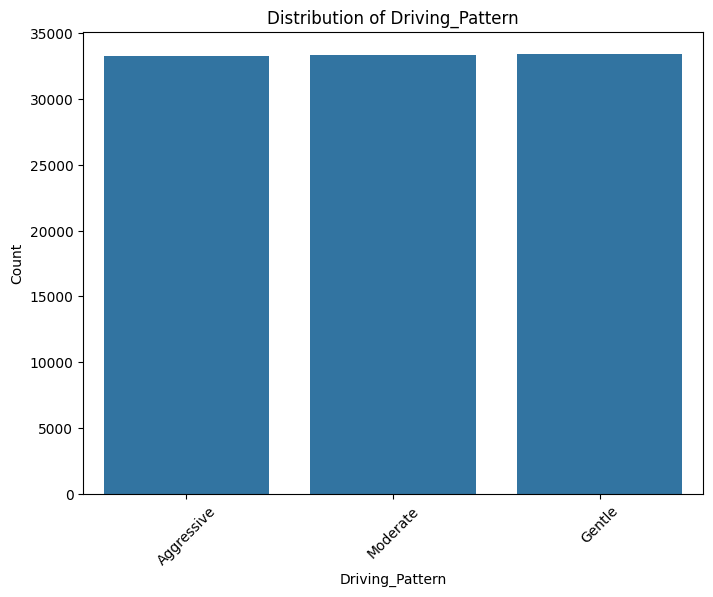

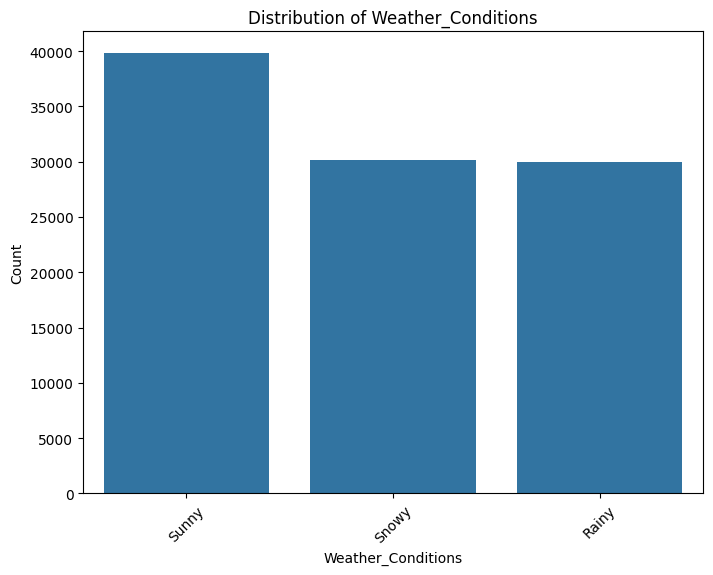

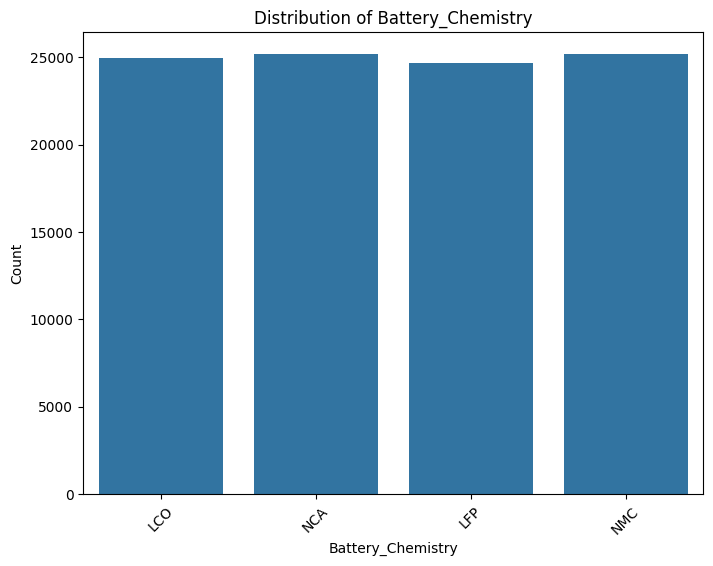

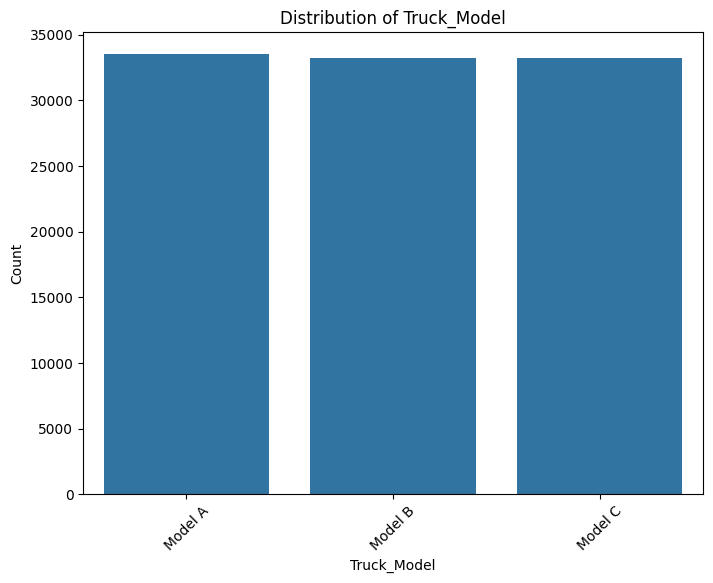

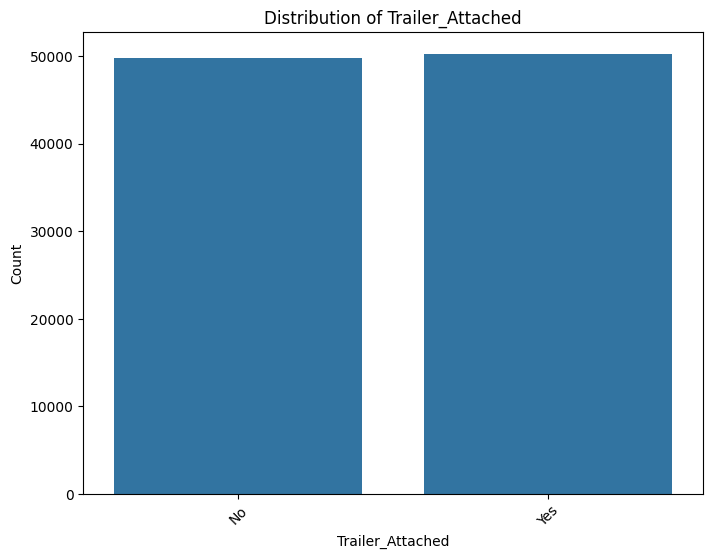

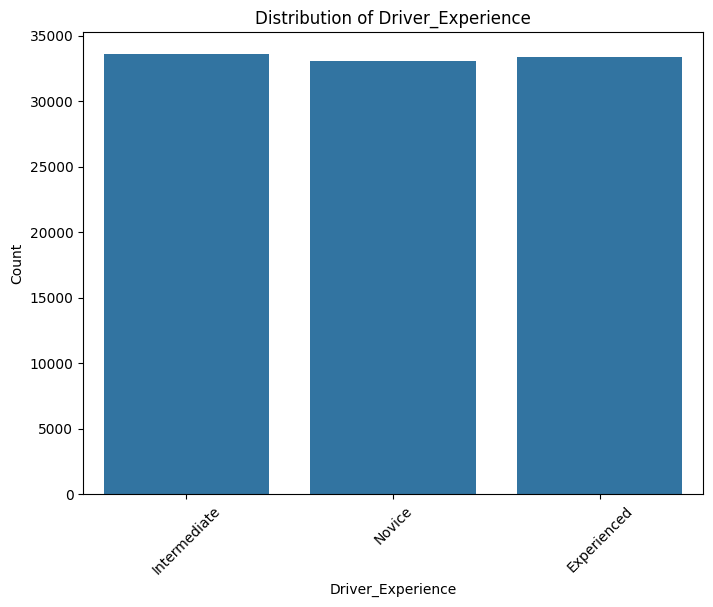

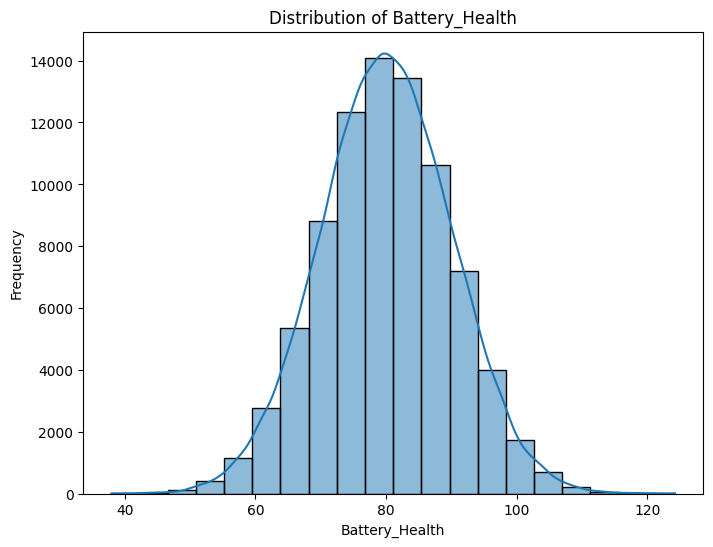

In [36]:

for col in train_df.columns:
    if train_df[col].dtype == 'float64':
        # For numeric columns, create histograms
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif train_df[col].dtype == 'object':
        # For categorical columns, create bar plots
        plt.figure(figsize=(8, 6))
        sns.countplot(data=train_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


<Axes: xlabel='Battery_Class'>

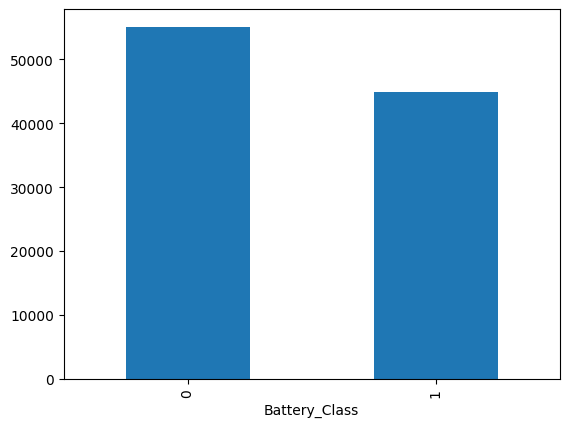

In [37]:
#What is the distribution of the target variable 'Battery_Class'?

train_df['Battery_Class'].value_counts().plot(kind='bar')


In [38]:
#How balanced is the dataset in terms of the target variable?

train_df['Battery_Class'].value_counts(normalize=True)


Battery_Class
0    0.55135
1    0.44865
Name: proportion, dtype: float64

In [39]:
#How do different 'Battery_Chemistry' types affect the distribution of 'Battery_Class'?

<Axes: xlabel='Battery_Chemistry', ylabel='count'>

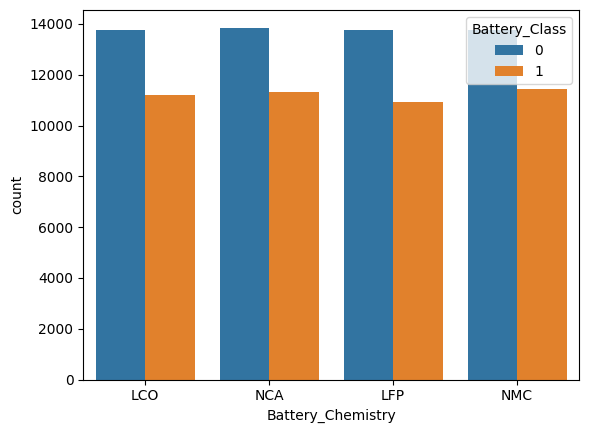

In [40]:
sns.countplot(data=train_df, x='Battery_Chemistry', hue='Battery_Class')

In [42]:
#Are there correlations between numeric features that might impact 'Battery_Class'?
# train_df[include=].corr()
train_df.select_dtypes(include=['float64']).corr()

,State_of_Charge,State_of_Health,Voltage,Current,Temperature,Cycling_Count,Internal_Resistance,Rate_of_Charge,Charge_Discharge_Efficiency,Depth_of_Discharge,...,Charging_Frequency,Payload_Distribution,Payload_Changes,Trailer_Attachment,Start_Stop_Frequency,Auxiliary_Power_Usage,Truck_Speed,Acceleration,Climate_Control_Usage,Battery_Health
State_of_Charge,1.000000,-0.001287,-0.003420,-0.002151,-0.000869,0.003349,0.000819,0.000664,0.000978,-0.000456,...,0.001825,-0.002390,-0.003614,0.006557,-0.003510,0.000500,-0.001011,0.002072,-0.000226,-0.001235
State_of_Health,-0.001287,1.000000,-0.004784,-0.003242,0.005141,-0.013114,-0.004834,-0.002076,0.001520,-0.001748,...,-0.001929,-0.002309,-0.003663,0.008244,0.001389,-0.002007,0.000901,-0.004284,-0.001181,-0.003744
Voltage,-0.003420,-0.004784,1.000000,-0.000369,-0.002312,-0.001554,-0.004907,0.000902,0.002518,-0.002874,...,0.000274,0.005504,0.003814,-0.002670,0.001000,-0.002683,0.000741,-0.000966,0.002307,-0.000511
Current,-0.002151,-0.003242,-0.000369,1.000000,-0.000492,0.002526,0.001864,-0.000767,0.002521,-0.001123,...,0.000465,0.000943,-0.006630,-0.000673,0.000588,0.003300,0.004842,-0.003314,-0.000828,-0.002061
Temperature,-0.000869,0.005141,-0.002312,-0.000492,1.000000,0.006027,-0.001217,-0.006551,0.004768,-0.001815,...,-0.002722,0.001638,0.001958,0.002710,-0.001030,-0.003338,0.003188,0.005333,0.000046,-0.011745
Cycling_Count,0.003349,-0.013114,-0.001554,0.002526,0.006027,1.000000,-0.002546,-0.000832,0.002712,-0.003614,...,-0.001487,-0.001360,0.001046,-0.005053,0.001432,-0.000176,0.001412,-0.003962,0.002083,0.003341
Internal_Resistance,0.000819,-0.004834,-0.004907,0.001864,-0.001217,-0.002546,1.000000,0.001871,0.003490,-0.007453,...,0.001136,-0.004333,0.000064,-0.001618,0.004226,0.001557,0.001608,0.003485,-0.000524,0.003075
Rate_of_Charge,0.000664,-0.002076,0.000902,-0.000767,-0.006551,-0.000832,0.001871,1.000000,-0.005955,0.000945,...,-0.002094,-0.001140,-0.005949,-0.002632,0.002149,-0.001922,-0.000233,-0.001400,-0.001845,-0.003664
Charge_Discharge_Efficiency,0.000978,0.001520,0.002518,0.002521,0.004768,0.002712,0.003490,-0.005955,1.000000,0.000130,...,0.005596,0.001946,-0.000598,-0.000878,-0.002416,-0.000592,-0.005904,0.001719,-0.000466,-0.002977
Depth_of_Discharge,-0.000456,-0.001748,-0.002874,-0.001123,-0.001815,-0.003614,-0.007453,0.000945,0.000130,1.000000,...,-0.002508,0.004682,0.002369,0.009160,0.000802,-0.003972,0.003090,-0.000211,-0.004263,0.002422


In [43]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [44]:
get_top_abs_correlations(train_df.drop(cat_columns, axis=1),3)

Battery_Health   Battery_Class    0.796233
State_of_Health  Cycling_Count    0.013114
Cycle_Life       Charging_Time    0.012462
dtype: float64

In [45]:
#What is the relationship between 'State_of_Health' and 'Cycle_Life' for different 'Battery_Chemistry' types?

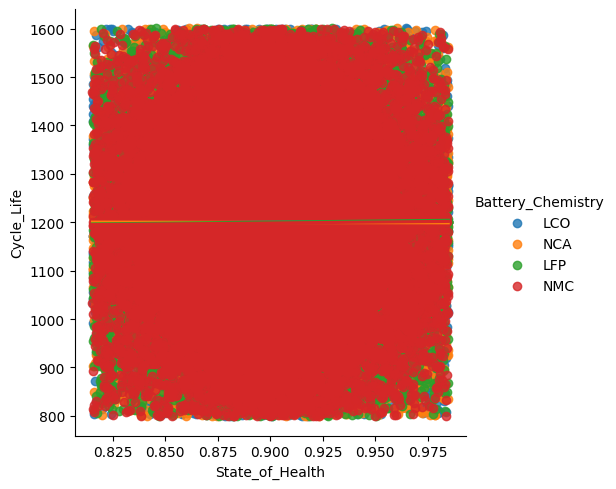

In [46]:
sns.lmplot(data=train_df, x='State_of_Health', y='Cycle_Life', hue='Battery_Chemistry')

<Axes: xlabel='State_of_Charge', ylabel='Depth_of_Discharge'>

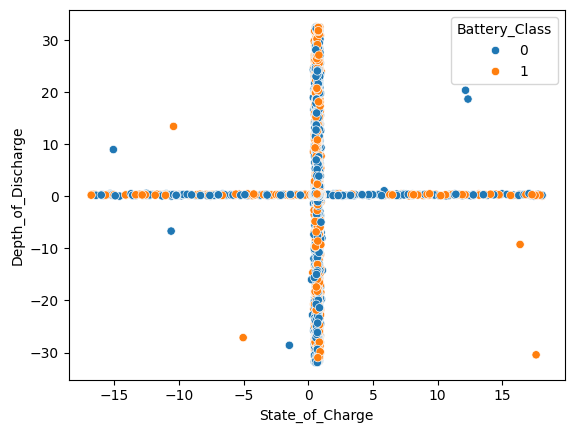

In [47]:
#Are there any interactions between 'State_of_Charge' and 'Depth_of_Discharge' that affect 'Battery_Class'?

sns.scatterplot(data=train_df, x='State_of_Charge', y='Depth_of_Discharge', hue='Battery_Class')


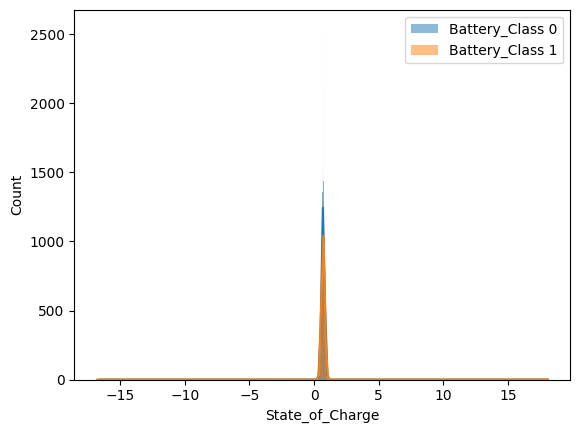

In [48]:
#What is the distribution of 'State_of_Charge' for 'Battery_Class' 0 and 1?

sns.histplot(data=train_df[train_df['Battery_Class'] == 0], x='State_of_Charge', label='Battery_Class 0', kde=True)
sns.histplot(data=train_df[train_df['Battery_Class'] == 1], x='State_of_Charge', label='Battery_Class 1', kde=True)
plt.legend()


<Axes: xlabel='Battery_Class', ylabel='Rate_of_Charge'>

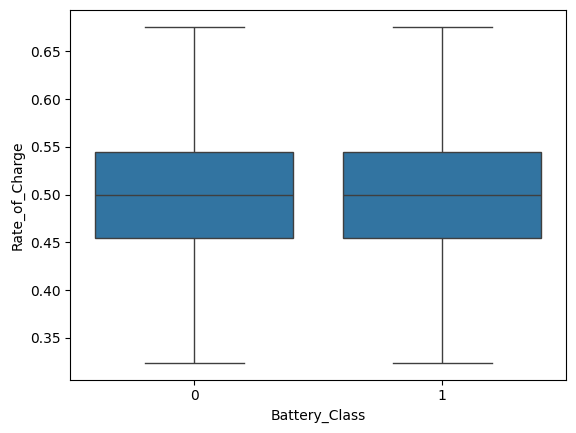

In [49]:
#Are there any outliers in 'Rate_of_Charge' for each 'Battery_Class' group?

sns.boxplot(data=train_df, x='Battery_Class', y='Rate_of_Charge')

<Axes: xlabel='Cycling_Count', ylabel='Depth_of_Discharge'>

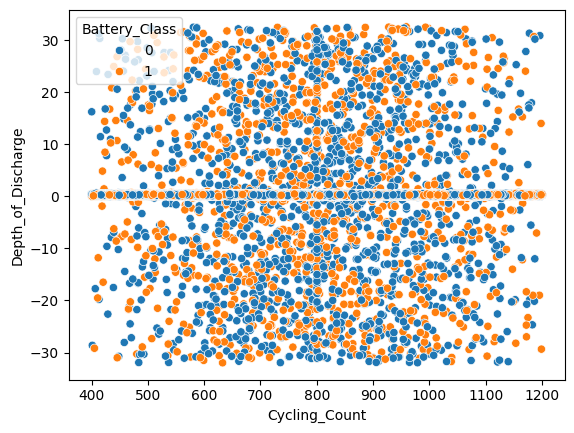

In [50]:
#How do 'Cycling_Count' and 'Depth_of_Discharge' interact to influence 'Battery_Class'?

sns.scatterplot(data=train_df, x='Cycling_Count', y='Depth_of_Discharge', hue='Battery_Class')


In [51]:
#Is 'Charging_Frequency' related to 'Battery_Class'? Conduct a chi-square test.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_df['Charging_Frequency'], train_df['Battery_Class'])
chi2, p, _, _ = chi2_contingency(contingency_table)

In [52]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=95428.82285657625, pvalue=0.5077709756457987, dof=95438, expected_freq=array([[0.55135, 0.44865],
       [0.55135, 0.44865],
       [0.55135, 0.44865],
       ...,
       [0.55135, 0.44865],
       [0.55135, 0.44865],
       [0.55135, 0.44865]]))

This suggests that there is insufficient evidence to conclude that 'Charging_Frequency' is related to 'Battery_Class' at a significance level of 0.05. In other words, based on the data, we do not have enough evidence to claim that there is a significant association between the charging frequency and battery class.


<Axes: xlabel='Battery_Chemistry', ylabel='State_of_Health'>

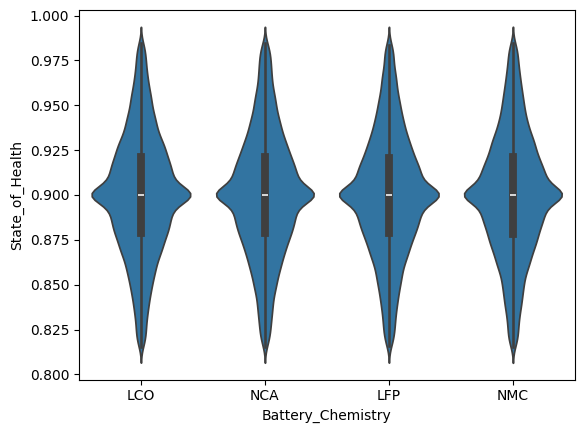

In [54]:
#How does 'State_of_Health' vary with 'Battery_Chemistry'?

sns.violinplot(data=train_df, x='Battery_Chemistry', y='State_of_Health')


<Axes: xlabel='Battery_Chemistry', ylabel='Cycle_Life'>

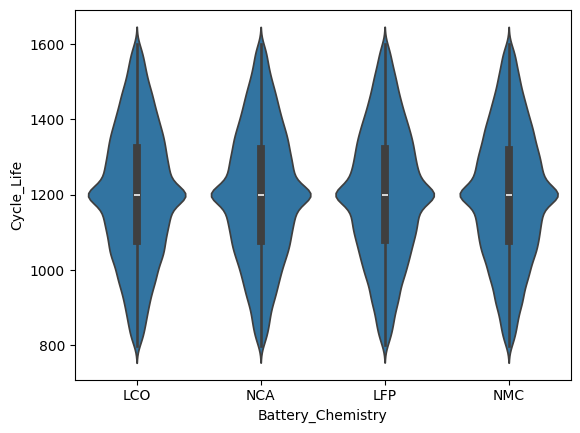

In [55]:
#What is the distribution of 'Cycle_Life' for different 'Battery_Chemistry' types?

sns.violinplot(data=train_df, x='Battery_Chemistry', y='Cycle_Life')


<Axes: xlabel='Battery_Class', ylabel='Depth_of_Discharge'>

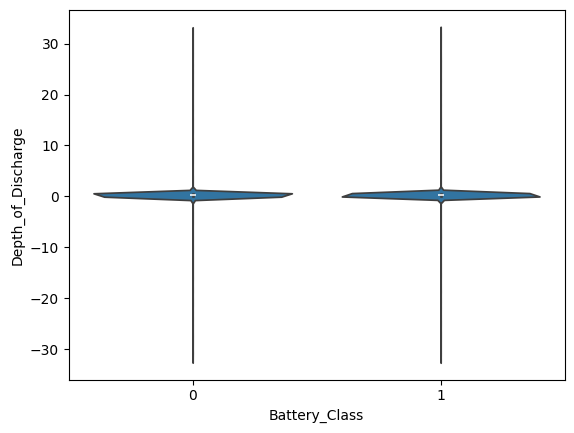

In [56]:
#How does 'Depth_of_Discharge' differ between 'Battery_Class' 0 and 1?

sns.violinplot(data=train_df[train_df['Battery_Class'].isin([0, 1])], x='Battery_Class', y='Depth_of_Discharge')


In [57]:
#Is there a significant difference in 'Rate_of_Charge' between different 'Battery_Chemistry' groups?

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(*[train_df['Rate_of_Charge'][train_df['Battery_Chemistry'] == chem] for chem in train_df['Battery_Chemistry'].unique()])
p_value

0.9014730023100411

In [58]:
#Does 'State_of_Health' differ significantly between 'Battery_Class' 0 and 1?


import scipy.stats as stats

# Two-sample t-test for 'State_of_Health' by 'Battery_Class'
class_0 = train_df[train_df['Battery_Class'] == 0]['State_of_Health']
class_1 = train_df[train_df['Battery_Class'] == 1]['State_of_Health']
t_statistic, p_value = stats.ttest_ind(class_0, class_1)
print("P-value for 'State_of_Health' by 'Battery_Class':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant difference in 'State_of_Health' between Battery_Class 0 and 1.")
else:
    print("Inference: There is no significant difference in 'State_of_Health' between Battery_Class 0 and 1.")

P-value for 'State_of_Health' by 'Battery_Class': 0.4156810617066482
Inference: There is no significant difference in 'State_of_Health' between Battery_Class 0 and 1.


In [59]:
#Is there a significant difference in 'Cycle_Life' between different 'Battery_Class' values?

# One-way ANOVA for 'Cycle_Life' by 'Battery_Class'
f_statistic, p_value = f_oneway(train_df['Cycle_Life'][train_df['Battery_Class'] == 0], train_df['Cycle_Life'][train_df['Battery_Class'] == 1])
print("P-value for 'Cycle_Life' by 'Battery_Class':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant difference in 'Cycle_Life' among Battery_Class groups.")
else:
    print("Inference: There is no significant difference in 'Cycle_Life' among Battery_Class groups.")

P-value for 'Cycle_Life' by 'Battery_Class': 0.8547658017578017
Inference: There is no significant difference in 'Cycle_Life' among Battery_Class groups.


In [60]:



# Two-way ANOVA for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry'
model = ols('Rate_of_Charge ~ C(Battery_Class) * C(Battery_Chemistry)', data=train_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("P-value for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry':", anova_table.loc['C(Battery_Class):C(Battery_Chemistry)', 'PR(>F)'])
if anova_table.loc['C(Battery_Class):C(Battery_Chemistry)', 'PR(>F)'] < 0.05:
    print("Inference: There is a significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.")
else:
    print("Inference: There is no significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.")

P-value for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry': 0.4425524956850405
Inference: There is no significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.


In [61]:

# Chi-square test for independence between 'Battery_Class' and 'State_of_Charge'
contingency_table = pd.crosstab(train_df['Battery_Class'], train_df['State_of_Charge'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value for Chi-square test between 'Battery_Class' and 'State_of_Charge':", p_value)
if p_value < 0.05:
    print("Inference: 'Battery_Class' and 'State_of_Charge' are dependent variables.")
else:
    print("Inference: 'Battery_Class' and 'State_of_Charge' are independent variables.")

P-value for Chi-square test between 'Battery_Class' and 'State_of_Charge': 0.5099798179543006
Inference: 'Battery_Class' and 'State_of_Charge' are independent variables.


In [62]:

# Two-sample t-test for 'Cathode_Degradation' by 'Battery_Class' within each 'Battery_Chemistry' type
for chem in train_df['Battery_Chemistry'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Battery_Chemistry'] == chem)]['Cathode_Degradation']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Battery_Chemistry'] == chem)]['Cathode_Degradation']
    t_statistic, p_value = stats.ttest_ind(class_0, class_1)
    print(f"P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' {chem}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")
    else:
        print(f"Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")


P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' LCO: 0.5206735544616006
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' LCO.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' NCA: 0.039523199136226025
Inference: There is a significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' NCA.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' LFP: 0.9221849171050349
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' LFP.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' NMC: 0.31353799074290384
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' NMC.


In [63]:



# Mann-Whitney U test for 'Depth_of_Discharge' by 'Battery_Class' within each 'Battery_Chemistry' type
for chem in train_df['Battery_Chemistry'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Battery_Chemistry'] == chem)]['Depth_of_Discharge']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Battery_Chemistry'] == chem)]['Depth_of_Discharge']
    U_statistic, p_value = mannwhitneyu(class_0, class_1, alternative='two-sided')
    print(f"P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' {chem}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")
    else:
        print(f"Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")

P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' LCO: 0.5327481109374741
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' LCO.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' NCA: 0.48759789667052345
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' NCA.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' LFP: 0.9143014306108764
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' LFP.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' NMC: 0.7285285812934125
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' NMC.


In [64]:

# Pearson correlation test for 'Rate_of_Charge' and 'State_of_Charge'
correlation_coefficient, p_value = pearsonr(train_df['Rate_of_Charge'], train_df['State_of_Charge'])
print("P-value for Pearson correlation test between 'Rate_of_Charge' and 'State_of_Charge':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant positive correlation between 'Rate_of_Charge' and 'State_of_Charge'.")
else:
    print("Inference: There is no significant correlation between 'Rate_of_Charge' and 'State_of_Charge'.")


P-value for Pearson correlation test between 'Rate_of_Charge' and 'State_of_Charge': 0.8337187704642745
Inference: There is no significant correlation between 'Rate_of_Charge' and 'State_of_Charge'.


In [65]:


# Two-sample t-test for 'State_of_Charge' by 'Battery_Class' within each 'Charging_Infrastructure' group
for infrastructure in train_df['Charging_Infrastructure'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Charging_Infrastructure'] == infrastructure)]['State_of_Charge']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Charging_Infrastructure'] == infrastructure)]['State_of_Charge']
    t_statistic, p_value = stats.ttest_ind(class_0, class_1)
    print(f"P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' {infrastructure}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' {infrastructure}.")
    else:
        print(f"Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' {infrastructure}.")


P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' DC Fast Charger: 0.8799284153212494
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' DC Fast Charger.
P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' Level 2: 0.6518687310042492
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' Level 2.
P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' Level 1: 0.093600494010129
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' Level 1.


In [66]:
data_backup = train_df.copy()

In [67]:
### Using Feature Selection Technique

In [68]:
#Weight of Evidence and Information Value and Multi-collinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor (X.values, i) for i in range(X.shape[1])]
    return vif


In [71]:
calculate_vif(train_df[num_columns])

,variables,VIF
0,State_of_Charge,2.185255
1,State_of_Health,609.674601
2,Voltage,1230.609630
3,Current,28.566179
4,Temperature,12.339138
5,Cycling_Count,22.466178
6,Internal_Resistance,34.511191
7,Rate_of_Charge,50.222817
8,Charge_Discharge_Efficiency,420.426209
9,Depth_of_Discharge,1.010005


In [78]:
def cal_iv_num(df2, feature, target):
    df = df2.copy()
    print(feature)
    lst = []
    df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
    df[feature] = df[feature].fillna(0)
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
    #Split continous variables into max 10 bins based on percentile
    df[feature+'_bin'] = pd.qcut(df[feature], q=100, duplicates='drop')
    for i in range(df[feature+'_bin'].nunique()):
        val = list(df[feature+'_bin'].unique())[i]
        lst.append([feature,
                    val,
                    df[df[feature+'_bin']==val].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==0)].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==1)].count()[feature] 
                    ])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad'])/(data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad']/data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good']/data['Distribution Bad'])
    data = data.replace({'WoE':{np.inf:0, -np.inf:0}})
    data['IV_bin'] = data['WoE']*(data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable','Value'], ascending=[True, True])
    data.index = range(len(data.index))
    data['IV'] = data['IV_bin'].sum()

    return data


def cal_iv_cat(df2, feature, target):
    df = df2.copy()
    print(feature)
    lst = []
    #Ignore features having more than 100 unique values
    if df[feature].nunique()>100:
        return pd.DataFrame()

    df[feature] = df[feature].fillna(0)
    df[feature+'_bin'] = df[feature]

    for i in range(df[feature+'_bin'].nunique()):
        val = list(df[feature+'_bin'].unique())[i]

        lst.append([feature,
                    val,
                    df[df[feature+'_bin']==val].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==0)].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==1)].count()[feature] 
                    ])
    
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad'])/(data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad']/data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good']/data['Distribution Bad'])
    data = data.replace({'WoE':{np.inf:0, -np.inf:0}})
    data['IV_bin'] = data['WoE']*(data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable','Value'], ascending=[True, True])
    data.index = range(len(data.index))
    data['IV'] = data['IV_bin'].sum()

    return data


# def iterate_vars_iv(df, Cat_vars, target):
#     data = pd.DataFrame()

#     varlist = list(df.columns)

#     for i in pd.Series(varlist):
#         if str(i) in Cat_vars:
#             data = data.append(cal_iv_cat(df, str(i), target))
#         else:
#             data = data.append(cal_iv_num(df, str(i), target))

#     return data

In [79]:
def iterate_vars_iv(df, Cat_vars, target):
    iv_data_list = []

    varlist = list(df.columns)

    for var in varlist:
        if var in Cat_vars:
            iv_data_list.append(cal_iv_cat(df, var, target))
        else:
            iv_data_list.append(cal_iv_num(df, var, target))

    return pd.concat(iv_data_list, ignore_index=True)

In [80]:
iv_df = iterate_vars_iv(train_df, cat_columns,'Battery_Class')

State_of_Charge
State_of_Health
Voltage
Current
Temperature
Cycling_Count
Internal_Resistance
Rate_of_Charge
Charge_Discharge_Efficiency
Depth_of_Discharge
Charge_Rate
Discharge_Rate
Voltage_Sag
Cell_Balancing_Status
Self_Discharge_Rate
EIS_Data
Cycle_Life
Max_Charge_Power
Max_Discharge_Power
Anode_Degradation
Cathode_Degradation
Electrolyte_Level
Chemical_Composition
Rate_of_Charge_Peak
Rate_of_Discharge_Peak
Calendar_Aging
Cell_Voltage_Balance
Altitude_Change
Tire_Pressure
Regenerative_Braking
Load_Weight
Road_Inclination
Idle_Time
Charging_Time
Charging_Frequency
Payload_Distribution
Payload_Changes
Trailer_Attachment
Start_Stop_Frequency
Auxiliary_Power_Usage
Truck_Speed
Acceleration
Climate_Control_Usage
Electrolyte_Type
Charging_Infrastructure
Road_Type
Driving_Pattern
Weather_Conditions
Battery_Chemistry
Truck_Model
Trailer_Attached
Driver_Experience
Battery_Health
Battery_Class


In [81]:
iv_df[['Variable','WoE','IV']].drop_duplicates(subset = 'Variable', keep='last').reset_index(drop=True)

,Variable,WoE,IV
0,State_of_Charge,0.039095,0.004729
1,State_of_Health,-0.037730,0.003795
2,Voltage,-0.029670,0.003490
3,Current,-0.049809,0.003861
4,Temperature,-0.041758,0.004663
5,Cycling_Count,-0.049809,0.004070
6,Internal_Resistance,-0.130090,0.003882
7,Rate_of_Charge,0.047220,0.002939
8,Charge_Discharge_Efficiency,0.010719,0.003517
9,Depth_of_Discharge,0.018817,0.003386


In [82]:
predictive_vars = iv_df[iv_df['IV'] > 0.5]['Variable'].tolist()
strong_vars = iv_df[(iv_df['IV'] <= 0.5) & (iv_df['IV'] > 0.3)]['Variable'].tolist()
medium_vars = iv_df[(iv_df['IV'] <= 0.3) & (iv_df['IV'] > 0.1)]['Variable'].tolist()
weak_vars = iv_df[(iv_df['IV'] <= 0.1) & (iv_df['IV'] > 0.02)]['Variable'].tolist()
not_predictive_vars = iv_df[iv_df['IV'] <= 0.02]['Variable'].tolist()

# Output lists of variables
print("Predictive Variables:")
print(predictive_vars)
print("\nStrong Variables:")
print(strong_vars)
print("\nMedium Variables:")
print(medium_vars)
print("\nWeak Variables:")
print(weak_vars)
print("\nNot Predictive Variables:")
print(not_predictive_vars)

Predictive Variables:
[]

Strong Variables:
[]

Medium Variables:
[]

Weak Variables:
['Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Health', 'Battery_Heal

In [83]:
le = LabelEncoder()

for col in train_df[cat_columns].columns:
    train_df[col] = le.fit_transform(train_df[col])
    train_df[col] = train_df[col].astype('category')

In [84]:
X_train = train_df.drop(['Battery_Class'], axis=1)

In [85]:
y_train = train_df['Battery_Class']

In [86]:
classifier= RandomForestClassifier(n_estimators=100, max_depth=10)

In [87]:
n_features_to_select = 15
rfe = RFE(classifier, n_features_to_select = n_features_to_select)
rfe.fit(X_train, y_train)

KeyboardInterrupt: 

In [72]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y,z in (sorted(zip(rfe.support_,rfe.ranking_ , features), key=itemgetter(0))):
    print(x,'__Rank',y,  '__' ,z) 

False __Rank 26 __ State_of_Charge
False __Rank 13 __ State_of_Health
False __Rank 18 __ Temperature
False __Rank 10 __ Cycling_Count
False __Rank 25 __ Internal_Resistance
False __Rank 5 __ Rate_of_Charge
False __Rank 14 __ Depth_of_Discharge
False __Rank 20 __ Discharge_Rate
False __Rank 11 __ Cell_Balancing_Status
False __Rank 7 __ Self_Discharge_Rate
False __Rank 19 __ Max_Charge_Power
False __Rank 17 __ Max_Discharge_Power
False __Rank 2 __ Anode_Degradation
False __Rank 15 __ Cathode_Degradation
False __Rank 16 __ Electrolyte_Level
False __Rank 27 __ Rate_of_Discharge_Peak
False __Rank 22 __ Calendar_Aging
False __Rank 29 __ Cell_Voltage_Balance
False __Rank 4 __ Altitude_Change
False __Rank 24 __ Load_Weight
False __Rank 12 __ Road_Inclination
False __Rank 21 __ Charging_Frequency
False __Rank 9 __ Payload_Changes
False __Rank 6 __ Trailer_Attachment
False __Rank 3 __ Start_Stop_Frequency
False __Rank 23 __ Auxiliary_Power_Usage
False __Rank 8 __ Truck_Speed
False __Rank 28 __ C

In [73]:
Feature_importance_DF = pd.DataFrame(zip(rfe.support_,rfe.ranking_ ,features),columns=['Support','Rank','Columns'])

In [74]:
Important_Features = Feature_importance_DF[Feature_importance_DF['Rank']==1]['Columns'].to_list()

In [83]:
print(Important_Features)

['Voltage', 'Current', 'Charge_Discharge_Efficiency', 'Charge_Rate', 'Voltage_Sag', 'EIS_Data', 'Cycle_Life', 'Chemical_Composition', 'Rate_of_Charge_Peak', 'Tire_Pressure', 'Regenerative_Braking', 'Idle_Time', 'Charging_Time', 'Payload_Distribution', 'Acceleration']


<AxesSubplot: >

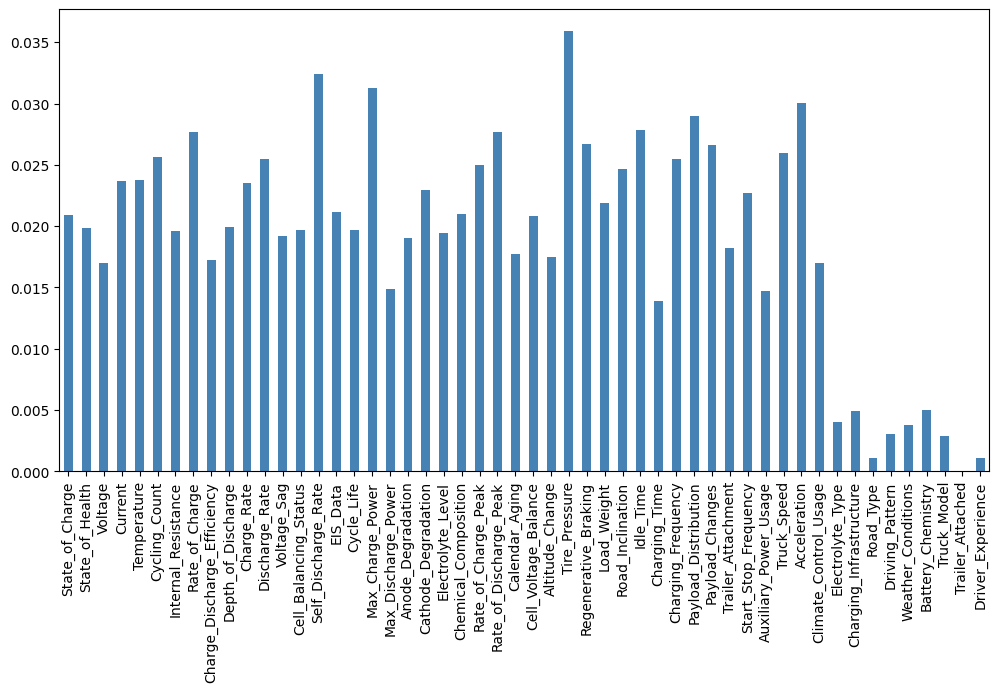

In [75]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pd.Series(clf.feature_importances_, index=X_train.columns[:]).plot.bar(color='steelblue', figsize=(12, 6))

In [76]:
from pycaret.classification import * 

In [77]:
exp_clf = setup(train_df, target='Battery_Class',imputation_type='iterative',fix_imbalance = True)

,Description,Value
0,session_id,1760
1,Target,Battery_Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 53)"
5,Missing Values,False
6,Numeric Features,43
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [78]:
top3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5149,0.5026,0.6517,0.5400,0.5905,0.0082,0.0085,0.9330
catboost,CatBoost Classifier,0.5148,0.4974,0.6626,0.5390,0.5943,0.0062,0.0066,16.3620
xgboost,Extreme Gradient Boosting,0.5094,0.5026,0.5878,0.5396,0.5625,0.0062,0.0062,4.1120
knn,K Neighbors Classifier,0.5079,0.5146,0.4697,0.5489,0.5060,0.0217,0.0220,0.1790
gbc,Gradient Boosting Classifier,0.5031,0.4890,0.6413,0.5308,0.5805,-0.0161,-0.0166,4.5250
lightgbm,Light Gradient Boosting Machine,0.5028,0.4934,0.6033,0.5326,0.5656,-0.0105,-0.0106,0.5130
dt,Decision Tree Classifier,0.5009,0.4985,0.5311,0.5355,0.5333,-0.0030,-0.0030,0.2970
ridge,Ridge Classifier,0.4996,0.0000,0.5027,0.5362,0.5187,-0.0012,-0.0012,0.0980
rf,Random Forest Classifier,0.4996,0.4894,0.6120,0.5294,0.5677,-0.0189,-0.0191,1.7100
lda,Linear Discriminant Analysis,0.4965,0.4953,0.4963,0.5330,0.5137,-0.0068,-0.0069,0.1550


In [88]:
train_df.to_csv('../data/Processed_Data_1lac.csv', index=False)